In [ ]:

import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

ruedas = 14
upper = 70
lower = 30
ventana = 10
       
data = yf.download('AAPL', end='2020-08-10')

data['dif'] = data['Adj Close'].diff()
data['win'] = np.where(data['dif'] > 0, data['dif'], 0)
data['loss'] = np.where(data['dif'] < 0, abs(data['dif']), 0)
data['ema_win'] = data.win.rolling(ruedas).mean()
data['ema_loss'] = data.loss.rolling(ruedas).mean()
data['rs'] = data.ema_win / data.ema_loss
data['rsi'] = 100 - (100 / (1+data.rs))

data.loc[data['rsi'] > upper, 'sell'] = (data['Adj Close'].shift(ventana)/data['Adj Close'] - 1) * 100
data.loc[data['rsi'] < lower, 'buy'] = (data['Adj Close'].shift(ventana)/data['Adj Close'] - 1) * 100
data['buy_hold'] = (data['Adj Close'].shift(ventana)/data['Adj Close'] - 1) * 100

pd.options.display.min_rows = 1000
    
data
#data.buy_hold.hist(bins=500)    
data.sell.hist(bins=500)
data.buy.hist(bins=500)

#print(data.sell.describe(), data.buy.describe())

Traigo las 503 acciones del S&P al Kernel

In [13]:
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = list(sp500.Symbol)
sp500_tickers = [e for e in sp500_tickers if e not in ('BRK.B','BF.B')]

tickers = sp500_tickers
cierres = yf.download(tickers, start='2018-01-01')['Adj Close']
cierres = cierres.loc[:, (cierres != 0).all(axis=0)]


[*********************100%***********************]  503 of 503 completed


In [1]:
#print(tickers)

Defino RSI como funcion (FRSI)

In [17]:
ruedas = 14
upper = 70
lower = 30
ventana = 10
def frsi (ticker, ruedas = 14, upper = 70 , lower = 30 , ventana = 10):
    data = pd.DataFrame(cierres[ticker])
    data['dif'] = data[ticker].diff()
    data['win'] = np.where(data['dif'] > 0, data['dif'], 0)
    data['loss'] = np.where(data['dif'] < 0, abs(data['dif']), 0)
    data['ema_win'] = data.win.rolling(ruedas).mean()
    data['ema_loss'] = data.loss.rolling(ruedas).mean()
    data['rs'] = data.ema_win / data.ema_loss
    data['rsi'] = 100 - (100 / (1+data.rs))
    data['a'] = (data[ticker].shift(-ventana)/data[ticker]-1)*100
    data.loc[data['rsi'] > upper, 'sell'] = data['a']
    data.loc[data['rsi'] < lower, 'buy'] = data['a']
    pd.options.display.min_rows = 1000
    return data



Concateno todas las señanes de venta y de compra por el frsi por cada accion del S&P

In [11]:
panel = pd.DataFrame()
sellpanel = pd.DataFrame()
buypanel = pd.DataFrame()
i = 0
for ticker in sp500_tickers:
    sellpanel1 = frsi(ticker).sell
    buypanel1 = frsi(ticker).buy
    sellpanel = pd.concat([sellpanel,sellpanel1],axis=0)
    buypanel = pd.concat([buypanel,buypanel1],axis=0)
    i = i + 1
    print(i)

panel = pd.concat([sellpanel,buypanel],axis=1)    
panel.columns = ['Sell', 'Buy']
panel.describe()



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,Sell,Buy
count,200361.000000,102035.000000
mean,0.407415,0.537786
std,4.617118,8.128993
min,-71.116502,-80.287206
25%,-1.908614,-2.479146
50%,0.505857,0.924490
75%,2.782767,4.283996
max,67.070598,212.605055


In [78]:
print(panel.Sell.median(),panel.Buy.median())

0.5052866648408649 0.9071311012579297


In [7]:
parametros = pd.DataFrame()
i = 0
l = 30
for r in range(8,14):
    for u in range(65,71):
        panel = pd.DataFrame()
        sellpanel = pd.DataFrame()
        buypanel = pd.DataFrame()
        for ticker in sp500_tickers:
            sellpanel1 = frsi(ticker,r,u,l).sell
            buypanel1 = frsi(ticker,r,u,l).buy
            sellpanel = pd.concat([sellpanel,sellpanel1],axis=0)
            buypanel = pd.concat([buypanel,buypanel1],axis=0)
            i = i + 1
            print(r,u,l,i)

        panel = pd.concat([sellpanel,buypanel],axis=1)    
        panel.columns = ['Sell', 'Buy']
        #panel.describe()
        parametros.loc[i,'ruedas'] = r
        parametros.loc[i,'upper'] = u
        parametros.loc[i,'lower'] = l
        parametros.loc[i,'median_sell'] = panel.Sell.median()
        parametros.loc[i,'median_buy'] = panel.Buy.median()
        print(parametros)
    
    for l in range(30,36):
        panel = pd.DataFrame()
        sellpanel = pd.DataFrame()
        buypanel = pd.DataFrame()
        for ticker in sp500_tickers:
            sellpanel1 = frsi(ticker,r,u,l).sell
            buypanel1 = frsi(ticker,r,u,l).buy
            sellpanel = pd.concat([sellpanel,sellpanel1],axis=0)
            buypanel = pd.concat([buypanel,buypanel1],axis=0)
            i = i + 1
            print(r,u,l,i)

        panel = pd.concat([sellpanel,buypanel],axis=1)    
        panel.columns = ['Sell', 'Buy']
        #panel.describe()
        parametros.loc[i,'ruedas'] = r
        parametros.loc[i,'upper'] = u
        parametros.loc[i,'lower'] = l
        parametros.loc[i,'median_sell'] = panel.Sell.median()
        parametros.loc[i,'median_buy'] = panel.Buy.median()
        print(parametros)
            
parametros['spread'] = parametros['median_buy'] - parametros['median_sell']
print(parametros)
parametros.to_excel("TPfinal.xlsx")            
            
            


8 65 30 1
8 65 30 2
8 65 30 3
8 65 30 4
8 65 30 5
8 65 30 6
8 65 30 7
8 65 30 8
8 65 30 9
8 65 30 10
8 65 30 11
8 65 30 12
8 65 30 13
8 65 30 14
8 65 30 15
8 65 30 16
8 65 30 17
8 65 30 18
8 65 30 19
8 65 30 20
8 65 30 21
8 65 30 22
8 65 30 23
8 65 30 24
8 65 30 25
8 65 30 26
8 65 30 27
8 65 30 28
8 65 30 29
8 65 30 30
8 65 30 31
8 65 30 32
8 65 30 33
8 65 30 34
8 65 30 35
8 65 30 36
8 65 30 37
8 65 30 38
8 65 30 39
8 65 30 40
8 65 30 41
8 65 30 42
8 65 30 43
8 65 30 44
8 65 30 45
8 65 30 46
8 65 30 47
8 65 30 48
8 65 30 49
8 65 30 50
8 65 30 51
8 65 30 52
8 65 30 53
8 65 30 54
8 65 30 55
8 65 30 56
8 65 30 57
8 65 30 58
8 65 30 59
8 65 30 60
8 65 30 61
8 65 30 62
8 65 30 63
8 65 30 64
8 65 30 65
8 65 30 66
8 65 30 67
8 65 30 68
8 65 30 69
8 65 30 70
8 65 30 71
8 65 30 72
8 65 30 73
8 65 30 74
8 65 30 75
8 65 30 76
8 65 30 77
8 65 30 78
8 65 30 79
8 65 30 80
8 65 30 81
8 65 30 82
8 65 30 83
8 65 30 84
8 65 30 85
8 65 30 86
8 65 30 87
8 65 30 88
8 65 30 89
8 65 30 90
8 65 30 91
8 65 30 

8 66 30 686
8 66 30 687
8 66 30 688
8 66 30 689
8 66 30 690
8 66 30 691
8 66 30 692
8 66 30 693
8 66 30 694
8 66 30 695
8 66 30 696
8 66 30 697
8 66 30 698
8 66 30 699
8 66 30 700
8 66 30 701
8 66 30 702
8 66 30 703
8 66 30 704
8 66 30 705
8 66 30 706
8 66 30 707
8 66 30 708
8 66 30 709
8 66 30 710
8 66 30 711
8 66 30 712
8 66 30 713
8 66 30 714
8 66 30 715
8 66 30 716
8 66 30 717
8 66 30 718
8 66 30 719
8 66 30 720
8 66 30 721
8 66 30 722
8 66 30 723
8 66 30 724
8 66 30 725
8 66 30 726
8 66 30 727
8 66 30 728
8 66 30 729
8 66 30 730
8 66 30 731
8 66 30 732
8 66 30 733
8 66 30 734
8 66 30 735
8 66 30 736
8 66 30 737
8 66 30 738
8 66 30 739
8 66 30 740
8 66 30 741
8 66 30 742
8 66 30 743
8 66 30 744
8 66 30 745
8 66 30 746
8 66 30 747
8 66 30 748
8 66 30 749
8 66 30 750
8 66 30 751
8 66 30 752
8 66 30 753
8 66 30 754
8 66 30 755
8 66 30 756
8 66 30 757
8 66 30 758
8 66 30 759
8 66 30 760
8 66 30 761
8 66 30 762
8 66 30 763
8 66 30 764
8 66 30 765
8 66 30 766
8 66 30 767
8 66 30 768
8 66

8 67 30 1329
8 67 30 1330
8 67 30 1331
8 67 30 1332
8 67 30 1333
8 67 30 1334
8 67 30 1335
8 67 30 1336
8 67 30 1337
8 67 30 1338
8 67 30 1339
8 67 30 1340
8 67 30 1341
8 67 30 1342
8 67 30 1343
8 67 30 1344
8 67 30 1345
8 67 30 1346
8 67 30 1347
8 67 30 1348
8 67 30 1349
8 67 30 1350
8 67 30 1351
8 67 30 1352
8 67 30 1353
8 67 30 1354
8 67 30 1355
8 67 30 1356
8 67 30 1357
8 67 30 1358
8 67 30 1359
8 67 30 1360
8 67 30 1361
8 67 30 1362
8 67 30 1363
8 67 30 1364
8 67 30 1365
8 67 30 1366
8 67 30 1367
8 67 30 1368
8 67 30 1369
8 67 30 1370
8 67 30 1371
8 67 30 1372
8 67 30 1373
8 67 30 1374
8 67 30 1375
8 67 30 1376
8 67 30 1377
8 67 30 1378
8 67 30 1379
8 67 30 1380
8 67 30 1381
8 67 30 1382
8 67 30 1383
8 67 30 1384
8 67 30 1385
8 67 30 1386
8 67 30 1387
8 67 30 1388
8 67 30 1389
8 67 30 1390
8 67 30 1391
8 67 30 1392
8 67 30 1393
8 67 30 1394
8 67 30 1395
8 67 30 1396
8 67 30 1397
8 67 30 1398
8 67 30 1399
8 67 30 1400
8 67 30 1401
8 67 30 1402
8 67 30 1403
8 67 30 1404
8 67 30 1405

8 68 30 1945
8 68 30 1946
8 68 30 1947
8 68 30 1948
8 68 30 1949
8 68 30 1950
8 68 30 1951
8 68 30 1952
8 68 30 1953
8 68 30 1954
8 68 30 1955
8 68 30 1956
8 68 30 1957
8 68 30 1958
8 68 30 1959
8 68 30 1960
8 68 30 1961
8 68 30 1962
8 68 30 1963
8 68 30 1964
8 68 30 1965
8 68 30 1966
8 68 30 1967
8 68 30 1968
8 68 30 1969
8 68 30 1970
8 68 30 1971
8 68 30 1972
8 68 30 1973
8 68 30 1974
8 68 30 1975
8 68 30 1976
8 68 30 1977
8 68 30 1978
8 68 30 1979
8 68 30 1980
8 68 30 1981
8 68 30 1982
8 68 30 1983
8 68 30 1984
8 68 30 1985
8 68 30 1986
8 68 30 1987
8 68 30 1988
8 68 30 1989
8 68 30 1990
8 68 30 1991
8 68 30 1992
8 68 30 1993
8 68 30 1994
8 68 30 1995
8 68 30 1996
8 68 30 1997
8 68 30 1998
8 68 30 1999
8 68 30 2000
8 68 30 2001
8 68 30 2002
8 68 30 2003
8 68 30 2004
8 68 30 2005
8 68 30 2006
8 68 30 2007
8 68 30 2008
8 68 30 2009
8 68 30 2010
8 68 30 2011
8 68 30 2012
      ruedas  upper  lower  median_sell  median_buy
503      8.0   65.0   30.0     0.483792    0.601569
1006     8.0

8 70 30 2532
8 70 30 2533
8 70 30 2534
8 70 30 2535
8 70 30 2536
8 70 30 2537
8 70 30 2538
8 70 30 2539
8 70 30 2540
8 70 30 2541
8 70 30 2542
8 70 30 2543
8 70 30 2544
8 70 30 2545
8 70 30 2546
8 70 30 2547
8 70 30 2548
8 70 30 2549
8 70 30 2550
8 70 30 2551
8 70 30 2552
8 70 30 2553
8 70 30 2554
8 70 30 2555
8 70 30 2556
8 70 30 2557
8 70 30 2558
8 70 30 2559
8 70 30 2560
8 70 30 2561
8 70 30 2562
8 70 30 2563
8 70 30 2564
8 70 30 2565
8 70 30 2566
8 70 30 2567
8 70 30 2568
8 70 30 2569
8 70 30 2570
8 70 30 2571
8 70 30 2572
8 70 30 2573
8 70 30 2574
8 70 30 2575
8 70 30 2576
8 70 30 2577
8 70 30 2578
8 70 30 2579
8 70 30 2580
8 70 30 2581
8 70 30 2582
8 70 30 2583
8 70 30 2584
8 70 30 2585
8 70 30 2586
8 70 30 2587
8 70 30 2588
8 70 30 2589
8 70 30 2590
8 70 30 2591
8 70 30 2592
8 70 30 2593
8 70 30 2594
8 70 30 2595
8 70 30 2596
8 70 30 2597
8 70 30 2598
8 70 30 2599
8 70 30 2600
8 70 30 2601
8 70 30 2602
8 70 30 2603
8 70 30 2604
8 70 30 2605
8 70 30 2606
8 70 30 2607
8 70 30 2608

8 70 30 3137
8 70 30 3138
8 70 30 3139
8 70 30 3140
8 70 30 3141
8 70 30 3142
8 70 30 3143
8 70 30 3144
8 70 30 3145
8 70 30 3146
8 70 30 3147
8 70 30 3148
8 70 30 3149
8 70 30 3150
8 70 30 3151
8 70 30 3152
8 70 30 3153
8 70 30 3154
8 70 30 3155
8 70 30 3156
8 70 30 3157
8 70 30 3158
8 70 30 3159
8 70 30 3160
8 70 30 3161
8 70 30 3162
8 70 30 3163
8 70 30 3164
8 70 30 3165
8 70 30 3166
8 70 30 3167
8 70 30 3168
8 70 30 3169
8 70 30 3170
8 70 30 3171
8 70 30 3172
8 70 30 3173
8 70 30 3174
8 70 30 3175
8 70 30 3176
8 70 30 3177
8 70 30 3178
8 70 30 3179
8 70 30 3180
8 70 30 3181
8 70 30 3182
8 70 30 3183
8 70 30 3184
8 70 30 3185
8 70 30 3186
8 70 30 3187
8 70 30 3188
8 70 30 3189
8 70 30 3190
8 70 30 3191
8 70 30 3192
8 70 30 3193
8 70 30 3194
8 70 30 3195
8 70 30 3196
8 70 30 3197
8 70 30 3198
8 70 30 3199
8 70 30 3200
8 70 30 3201
8 70 30 3202
8 70 30 3203
8 70 30 3204
8 70 30 3205
8 70 30 3206
8 70 30 3207
8 70 30 3208
8 70 30 3209
8 70 30 3210
8 70 30 3211
8 70 30 3212
8 70 30 3213

8 70 31 3736
8 70 31 3737
8 70 31 3738
8 70 31 3739
8 70 31 3740
8 70 31 3741
8 70 31 3742
8 70 31 3743
8 70 31 3744
8 70 31 3745
8 70 31 3746
8 70 31 3747
8 70 31 3748
8 70 31 3749
8 70 31 3750
8 70 31 3751
8 70 31 3752
8 70 31 3753
8 70 31 3754
8 70 31 3755
8 70 31 3756
8 70 31 3757
8 70 31 3758
8 70 31 3759
8 70 31 3760
8 70 31 3761
8 70 31 3762
8 70 31 3763
8 70 31 3764
8 70 31 3765
8 70 31 3766
8 70 31 3767
8 70 31 3768
8 70 31 3769
8 70 31 3770
8 70 31 3771
8 70 31 3772
8 70 31 3773
8 70 31 3774
8 70 31 3775
8 70 31 3776
8 70 31 3777
8 70 31 3778
8 70 31 3779
8 70 31 3780
8 70 31 3781
8 70 31 3782
8 70 31 3783
8 70 31 3784
8 70 31 3785
8 70 31 3786
8 70 31 3787
8 70 31 3788
8 70 31 3789
8 70 31 3790
8 70 31 3791
8 70 31 3792
8 70 31 3793
8 70 31 3794
8 70 31 3795
8 70 31 3796
8 70 31 3797
8 70 31 3798
8 70 31 3799
8 70 31 3800
8 70 31 3801
8 70 31 3802
8 70 31 3803
8 70 31 3804
8 70 31 3805
8 70 31 3806
8 70 31 3807
8 70 31 3808
8 70 31 3809
8 70 31 3810
8 70 31 3811
8 70 31 3812

8 70 32 4332
8 70 32 4333
8 70 32 4334
8 70 32 4335
8 70 32 4336
8 70 32 4337
8 70 32 4338
8 70 32 4339
8 70 32 4340
8 70 32 4341
8 70 32 4342
8 70 32 4343
8 70 32 4344
8 70 32 4345
8 70 32 4346
8 70 32 4347
8 70 32 4348
8 70 32 4349
8 70 32 4350
8 70 32 4351
8 70 32 4352
8 70 32 4353
8 70 32 4354
8 70 32 4355
8 70 32 4356
8 70 32 4357
8 70 32 4358
8 70 32 4359
8 70 32 4360
8 70 32 4361
8 70 32 4362
8 70 32 4363
8 70 32 4364
8 70 32 4365
8 70 32 4366
8 70 32 4367
8 70 32 4368
8 70 32 4369
8 70 32 4370
8 70 32 4371
8 70 32 4372
8 70 32 4373
8 70 32 4374
8 70 32 4375
8 70 32 4376
8 70 32 4377
8 70 32 4378
8 70 32 4379
8 70 32 4380
8 70 32 4381
8 70 32 4382
8 70 32 4383
8 70 32 4384
8 70 32 4385
8 70 32 4386
8 70 32 4387
8 70 32 4388
8 70 32 4389
8 70 32 4390
8 70 32 4391
8 70 32 4392
8 70 32 4393
8 70 32 4394
8 70 32 4395
8 70 32 4396
8 70 32 4397
8 70 32 4398
8 70 32 4399
8 70 32 4400
8 70 32 4401
8 70 32 4402
8 70 32 4403
8 70 32 4404
8 70 32 4405
8 70 32 4406
8 70 32 4407
8 70 32 4408

8 70 33 4924
8 70 33 4925
8 70 33 4926
8 70 33 4927
8 70 33 4928
8 70 33 4929
8 70 33 4930
8 70 33 4931
8 70 33 4932
8 70 33 4933
8 70 33 4934
8 70 33 4935
8 70 33 4936
8 70 33 4937
8 70 33 4938
8 70 33 4939
8 70 33 4940
8 70 33 4941
8 70 33 4942
8 70 33 4943
8 70 33 4944
8 70 33 4945
8 70 33 4946
8 70 33 4947
8 70 33 4948
8 70 33 4949
8 70 33 4950
8 70 33 4951
8 70 33 4952
8 70 33 4953
8 70 33 4954
8 70 33 4955
8 70 33 4956
8 70 33 4957
8 70 33 4958
8 70 33 4959
8 70 33 4960
8 70 33 4961
8 70 33 4962
8 70 33 4963
8 70 33 4964
8 70 33 4965
8 70 33 4966
8 70 33 4967
8 70 33 4968
8 70 33 4969
8 70 33 4970
8 70 33 4971
8 70 33 4972
8 70 33 4973
8 70 33 4974
8 70 33 4975
8 70 33 4976
8 70 33 4977
8 70 33 4978
8 70 33 4979
8 70 33 4980
8 70 33 4981
8 70 33 4982
8 70 33 4983
8 70 33 4984
8 70 33 4985
8 70 33 4986
8 70 33 4987
8 70 33 4988
8 70 33 4989
8 70 33 4990
8 70 33 4991
8 70 33 4992
8 70 33 4993
8 70 33 4994
8 70 33 4995
8 70 33 4996
8 70 33 4997
8 70 33 4998
8 70 33 4999
8 70 33 5000

8 70 34 5512
8 70 34 5513
8 70 34 5514
8 70 34 5515
8 70 34 5516
8 70 34 5517
8 70 34 5518
8 70 34 5519
8 70 34 5520
8 70 34 5521
8 70 34 5522
8 70 34 5523
8 70 34 5524
8 70 34 5525
8 70 34 5526
8 70 34 5527
8 70 34 5528
8 70 34 5529
8 70 34 5530
8 70 34 5531
8 70 34 5532
8 70 34 5533
      ruedas  upper  lower  median_sell  median_buy
503      8.0   65.0   30.0     0.483792    0.601569
1006     8.0   66.0   30.0     0.472277    0.601569
1509     8.0   67.0   30.0     0.461905    0.601569
2012     8.0   68.0   30.0     0.453954    0.601569
2515     8.0   69.0   30.0     0.446901    0.601569
3018     8.0   70.0   30.0     0.437457    0.601569
3521     8.0   70.0   30.0     0.437457    0.601569
4024     8.0   70.0   31.0     0.437457    0.624361
4527     8.0   70.0   32.0     0.437457    0.625006
5030     8.0   70.0   33.0     0.437457    0.629617
5533     8.0   70.0   34.0     0.437457    0.641690
8 70 35 5534
8 70 35 5535
8 70 35 5536
8 70 35 5537
8 70 35 5538
8 70 35 5539
8 70 35 5540

9 65 35 6044
9 65 35 6045
9 65 35 6046
9 65 35 6047
9 65 35 6048
9 65 35 6049
9 65 35 6050
9 65 35 6051
9 65 35 6052
9 65 35 6053
9 65 35 6054
9 65 35 6055
9 65 35 6056
9 65 35 6057
9 65 35 6058
9 65 35 6059
9 65 35 6060
9 65 35 6061
9 65 35 6062
9 65 35 6063
9 65 35 6064
9 65 35 6065
9 65 35 6066
9 65 35 6067
9 65 35 6068
9 65 35 6069
9 65 35 6070
9 65 35 6071
9 65 35 6072
9 65 35 6073
9 65 35 6074
9 65 35 6075
9 65 35 6076
9 65 35 6077
9 65 35 6078
9 65 35 6079
9 65 35 6080
9 65 35 6081
9 65 35 6082
9 65 35 6083
9 65 35 6084
9 65 35 6085
9 65 35 6086
9 65 35 6087
9 65 35 6088
9 65 35 6089
9 65 35 6090
9 65 35 6091
9 65 35 6092
9 65 35 6093
9 65 35 6094
9 65 35 6095
9 65 35 6096
9 65 35 6097
9 65 35 6098
9 65 35 6099
9 65 35 6100
9 65 35 6101
9 65 35 6102
9 65 35 6103
9 65 35 6104
9 65 35 6105
9 65 35 6106
9 65 35 6107
9 65 35 6108
9 65 35 6109
9 65 35 6110
9 65 35 6111
9 65 35 6112
9 65 35 6113
9 65 35 6114
9 65 35 6115
9 65 35 6116
9 65 35 6117
9 65 35 6118
9 65 35 6119
9 65 35 6120

9 66 35 6621
9 66 35 6622
9 66 35 6623
9 66 35 6624
9 66 35 6625
9 66 35 6626
9 66 35 6627
9 66 35 6628
9 66 35 6629
9 66 35 6630
9 66 35 6631
9 66 35 6632
9 66 35 6633
9 66 35 6634
9 66 35 6635
9 66 35 6636
9 66 35 6637
9 66 35 6638
9 66 35 6639
9 66 35 6640
9 66 35 6641
9 66 35 6642
9 66 35 6643
9 66 35 6644
9 66 35 6645
9 66 35 6646
9 66 35 6647
9 66 35 6648
9 66 35 6649
9 66 35 6650
9 66 35 6651
9 66 35 6652
9 66 35 6653
9 66 35 6654
9 66 35 6655
9 66 35 6656
9 66 35 6657
9 66 35 6658
9 66 35 6659
9 66 35 6660
9 66 35 6661
9 66 35 6662
9 66 35 6663
9 66 35 6664
9 66 35 6665
9 66 35 6666
9 66 35 6667
9 66 35 6668
9 66 35 6669
9 66 35 6670
9 66 35 6671
9 66 35 6672
9 66 35 6673
9 66 35 6674
9 66 35 6675
9 66 35 6676
9 66 35 6677
9 66 35 6678
9 66 35 6679
9 66 35 6680
9 66 35 6681
9 66 35 6682
9 66 35 6683
9 66 35 6684
9 66 35 6685
9 66 35 6686
9 66 35 6687
9 66 35 6688
9 66 35 6689
9 66 35 6690
9 66 35 6691
9 66 35 6692
9 66 35 6693
9 66 35 6694
9 66 35 6695
9 66 35 6696
9 66 35 6697

9 67 35 7193
9 67 35 7194
9 67 35 7195
9 67 35 7196
9 67 35 7197
9 67 35 7198
9 67 35 7199
9 67 35 7200
9 67 35 7201
9 67 35 7202
9 67 35 7203
9 67 35 7204
9 67 35 7205
9 67 35 7206
9 67 35 7207
9 67 35 7208
9 67 35 7209
9 67 35 7210
9 67 35 7211
9 67 35 7212
9 67 35 7213
9 67 35 7214
9 67 35 7215
9 67 35 7216
9 67 35 7217
9 67 35 7218
9 67 35 7219
9 67 35 7220
9 67 35 7221
9 67 35 7222
9 67 35 7223
9 67 35 7224
9 67 35 7225
9 67 35 7226
9 67 35 7227
9 67 35 7228
9 67 35 7229
9 67 35 7230
9 67 35 7231
9 67 35 7232
9 67 35 7233
9 67 35 7234
9 67 35 7235
9 67 35 7236
9 67 35 7237
9 67 35 7238
9 67 35 7239
9 67 35 7240
9 67 35 7241
9 67 35 7242
9 67 35 7243
9 67 35 7244
9 67 35 7245
9 67 35 7246
9 67 35 7247
9 67 35 7248
9 67 35 7249
9 67 35 7250
9 67 35 7251
9 67 35 7252
9 67 35 7253
9 67 35 7254
9 67 35 7255
9 67 35 7256
9 67 35 7257
9 67 35 7258
9 67 35 7259
9 67 35 7260
9 67 35 7261
9 67 35 7262
9 67 35 7263
9 67 35 7264
9 67 35 7265
9 67 35 7266
9 67 35 7267
9 67 35 7268
9 67 35 7269

9 68 35 7761
9 68 35 7762
9 68 35 7763
9 68 35 7764
9 68 35 7765
9 68 35 7766
9 68 35 7767
9 68 35 7768
9 68 35 7769
9 68 35 7770
9 68 35 7771
9 68 35 7772
9 68 35 7773
9 68 35 7774
9 68 35 7775
9 68 35 7776
9 68 35 7777
9 68 35 7778
9 68 35 7779
9 68 35 7780
9 68 35 7781
9 68 35 7782
9 68 35 7783
9 68 35 7784
9 68 35 7785
9 68 35 7786
9 68 35 7787
9 68 35 7788
9 68 35 7789
9 68 35 7790
9 68 35 7791
9 68 35 7792
9 68 35 7793
9 68 35 7794
9 68 35 7795
9 68 35 7796
9 68 35 7797
9 68 35 7798
9 68 35 7799
9 68 35 7800
9 68 35 7801
9 68 35 7802
9 68 35 7803
9 68 35 7804
9 68 35 7805
9 68 35 7806
9 68 35 7807
9 68 35 7808
9 68 35 7809
9 68 35 7810
9 68 35 7811
9 68 35 7812
9 68 35 7813
9 68 35 7814
9 68 35 7815
9 68 35 7816
9 68 35 7817
9 68 35 7818
9 68 35 7819
9 68 35 7820
9 68 35 7821
9 68 35 7822
9 68 35 7823
9 68 35 7824
9 68 35 7825
9 68 35 7826
9 68 35 7827
9 68 35 7828
9 68 35 7829
9 68 35 7830
9 68 35 7831
9 68 35 7832
9 68 35 7833
9 68 35 7834
9 68 35 7835
9 68 35 7836
9 68 35 7837

9 69 35 8325
9 69 35 8326
9 69 35 8327
9 69 35 8328
9 69 35 8329
9 69 35 8330
9 69 35 8331
9 69 35 8332
9 69 35 8333
9 69 35 8334
9 69 35 8335
9 69 35 8336
9 69 35 8337
9 69 35 8338
9 69 35 8339
9 69 35 8340
9 69 35 8341
9 69 35 8342
9 69 35 8343
9 69 35 8344
9 69 35 8345
9 69 35 8346
9 69 35 8347
9 69 35 8348
9 69 35 8349
9 69 35 8350
9 69 35 8351
9 69 35 8352
9 69 35 8353
9 69 35 8354
9 69 35 8355
9 69 35 8356
9 69 35 8357
9 69 35 8358
9 69 35 8359
9 69 35 8360
9 69 35 8361
9 69 35 8362
9 69 35 8363
9 69 35 8364
9 69 35 8365
9 69 35 8366
9 69 35 8367
9 69 35 8368
9 69 35 8369
9 69 35 8370
9 69 35 8371
9 69 35 8372
9 69 35 8373
9 69 35 8374
9 69 35 8375
9 69 35 8376
9 69 35 8377
9 69 35 8378
9 69 35 8379
9 69 35 8380
9 69 35 8381
9 69 35 8382
9 69 35 8383
9 69 35 8384
9 69 35 8385
9 69 35 8386
9 69 35 8387
9 69 35 8388
9 69 35 8389
9 69 35 8390
9 69 35 8391
9 69 35 8392
9 69 35 8393
9 69 35 8394
9 69 35 8395
9 69 35 8396
9 69 35 8397
9 69 35 8398
9 69 35 8399
9 69 35 8400
9 69 35 8401

9 70 35 8884
9 70 35 8885
9 70 35 8886
9 70 35 8887
9 70 35 8888
9 70 35 8889
9 70 35 8890
9 70 35 8891
9 70 35 8892
9 70 35 8893
9 70 35 8894
9 70 35 8895
9 70 35 8896
9 70 35 8897
9 70 35 8898
9 70 35 8899
9 70 35 8900
9 70 35 8901
9 70 35 8902
9 70 35 8903
9 70 35 8904
9 70 35 8905
9 70 35 8906
9 70 35 8907
9 70 35 8908
9 70 35 8909
9 70 35 8910
9 70 35 8911
9 70 35 8912
9 70 35 8913
9 70 35 8914
9 70 35 8915
9 70 35 8916
9 70 35 8917
9 70 35 8918
9 70 35 8919
9 70 35 8920
9 70 35 8921
9 70 35 8922
9 70 35 8923
9 70 35 8924
9 70 35 8925
9 70 35 8926
9 70 35 8927
9 70 35 8928
9 70 35 8929
9 70 35 8930
9 70 35 8931
9 70 35 8932
9 70 35 8933
9 70 35 8934
9 70 35 8935
9 70 35 8936
9 70 35 8937
9 70 35 8938
9 70 35 8939
9 70 35 8940
9 70 35 8941
9 70 35 8942
9 70 35 8943
9 70 35 8944
9 70 35 8945
9 70 35 8946
9 70 35 8947
9 70 35 8948
9 70 35 8949
9 70 35 8950
9 70 35 8951
9 70 35 8952
9 70 35 8953
9 70 35 8954
9 70 35 8955
9 70 35 8956
9 70 35 8957
9 70 35 8958
9 70 35 8959
9 70 35 8960

9 70 30 9439
9 70 30 9440
9 70 30 9441
9 70 30 9442
9 70 30 9443
9 70 30 9444
9 70 30 9445
9 70 30 9446
9 70 30 9447
9 70 30 9448
9 70 30 9449
9 70 30 9450
9 70 30 9451
9 70 30 9452
9 70 30 9453
9 70 30 9454
9 70 30 9455
9 70 30 9456
9 70 30 9457
9 70 30 9458
9 70 30 9459
9 70 30 9460
9 70 30 9461
9 70 30 9462
9 70 30 9463
9 70 30 9464
9 70 30 9465
9 70 30 9466
9 70 30 9467
9 70 30 9468
9 70 30 9469
9 70 30 9470
9 70 30 9471
9 70 30 9472
9 70 30 9473
9 70 30 9474
9 70 30 9475
9 70 30 9476
9 70 30 9477
9 70 30 9478
9 70 30 9479
9 70 30 9480
9 70 30 9481
9 70 30 9482
9 70 30 9483
9 70 30 9484
9 70 30 9485
9 70 30 9486
9 70 30 9487
9 70 30 9488
9 70 30 9489
9 70 30 9490
9 70 30 9491
9 70 30 9492
9 70 30 9493
9 70 30 9494
9 70 30 9495
9 70 30 9496
9 70 30 9497
9 70 30 9498
9 70 30 9499
9 70 30 9500
9 70 30 9501
9 70 30 9502
9 70 30 9503
9 70 30 9504
9 70 30 9505
9 70 30 9506
9 70 30 9507
9 70 30 9508
9 70 30 9509
9 70 30 9510
9 70 30 9511
9 70 30 9512
9 70 30 9513
9 70 30 9514
9 70 30 9515

9 70 31 9991
9 70 31 9992
9 70 31 9993
9 70 31 9994
9 70 31 9995
9 70 31 9996
9 70 31 9997
9 70 31 9998
9 70 31 9999
9 70 31 10000
9 70 31 10001
9 70 31 10002
9 70 31 10003
9 70 31 10004
9 70 31 10005
9 70 31 10006
9 70 31 10007
9 70 31 10008
9 70 31 10009
9 70 31 10010
9 70 31 10011
9 70 31 10012
9 70 31 10013
9 70 31 10014
9 70 31 10015
9 70 31 10016
9 70 31 10017
9 70 31 10018
9 70 31 10019
9 70 31 10020
9 70 31 10021
9 70 31 10022
9 70 31 10023
9 70 31 10024
9 70 31 10025
9 70 31 10026
9 70 31 10027
9 70 31 10028
9 70 31 10029
9 70 31 10030
9 70 31 10031
9 70 31 10032
9 70 31 10033
9 70 31 10034
9 70 31 10035
9 70 31 10036
9 70 31 10037
9 70 31 10038
9 70 31 10039
9 70 31 10040
9 70 31 10041
9 70 31 10042
9 70 31 10043
9 70 31 10044
9 70 31 10045
9 70 31 10046
9 70 31 10047
9 70 31 10048
9 70 31 10049
9 70 31 10050
9 70 31 10051
9 70 31 10052
9 70 31 10053
9 70 31 10054
9 70 31 10055
9 70 31 10056
9 70 31 10057
9 70 31 10058
9 70 31 10059
9 70 31 10060
       ruedas  upper  lower  

9 70 32 10499
9 70 32 10500
9 70 32 10501
9 70 32 10502
9 70 32 10503
9 70 32 10504
9 70 32 10505
9 70 32 10506
9 70 32 10507
9 70 32 10508
9 70 32 10509
9 70 32 10510
9 70 32 10511
9 70 32 10512
9 70 32 10513
9 70 32 10514
9 70 32 10515
9 70 32 10516
9 70 32 10517
9 70 32 10518
9 70 32 10519
9 70 32 10520
9 70 32 10521
9 70 32 10522
9 70 32 10523
9 70 32 10524
9 70 32 10525
9 70 32 10526
9 70 32 10527
9 70 32 10528
9 70 32 10529
9 70 32 10530
9 70 32 10531
9 70 32 10532
9 70 32 10533
9 70 32 10534
9 70 32 10535
9 70 32 10536
9 70 32 10537
9 70 32 10538
9 70 32 10539
9 70 32 10540
9 70 32 10541
9 70 32 10542
9 70 32 10543
9 70 32 10544
9 70 32 10545
9 70 32 10546
9 70 32 10547
9 70 32 10548
9 70 32 10549
9 70 32 10550
9 70 32 10551
9 70 32 10552
9 70 32 10553
9 70 32 10554
9 70 32 10555
9 70 32 10556
9 70 32 10557
9 70 32 10558
9 70 32 10559
9 70 32 10560
9 70 32 10561
9 70 32 10562
9 70 32 10563
       ruedas  upper  lower  median_sell  median_buy
503       8.0   65.0   30.0     0.483

9 70 33 11003
9 70 33 11004
9 70 33 11005
9 70 33 11006
9 70 33 11007
9 70 33 11008
9 70 33 11009
9 70 33 11010
9 70 33 11011
9 70 33 11012
9 70 33 11013
9 70 33 11014
9 70 33 11015
9 70 33 11016
9 70 33 11017
9 70 33 11018
9 70 33 11019
9 70 33 11020
9 70 33 11021
9 70 33 11022
9 70 33 11023
9 70 33 11024
9 70 33 11025
9 70 33 11026
9 70 33 11027
9 70 33 11028
9 70 33 11029
9 70 33 11030
9 70 33 11031
9 70 33 11032
9 70 33 11033
9 70 33 11034
9 70 33 11035
9 70 33 11036
9 70 33 11037
9 70 33 11038
9 70 33 11039
9 70 33 11040
9 70 33 11041
9 70 33 11042
9 70 33 11043
9 70 33 11044
9 70 33 11045
9 70 33 11046
9 70 33 11047
9 70 33 11048
9 70 33 11049
9 70 33 11050
9 70 33 11051
9 70 33 11052
9 70 33 11053
9 70 33 11054
9 70 33 11055
9 70 33 11056
9 70 33 11057
9 70 33 11058
9 70 33 11059
9 70 33 11060
9 70 33 11061
9 70 33 11062
9 70 33 11063
9 70 33 11064
9 70 33 11065
9 70 33 11066
       ruedas  upper  lower  median_sell  median_buy
503       8.0   65.0   30.0     0.483792    0.60156

9 70 34 11504
9 70 34 11505
9 70 34 11506
9 70 34 11507
9 70 34 11508
9 70 34 11509
9 70 34 11510
9 70 34 11511
9 70 34 11512
9 70 34 11513
9 70 34 11514
9 70 34 11515
9 70 34 11516
9 70 34 11517
9 70 34 11518
9 70 34 11519
9 70 34 11520
9 70 34 11521
9 70 34 11522
9 70 34 11523
9 70 34 11524
9 70 34 11525
9 70 34 11526
9 70 34 11527
9 70 34 11528
9 70 34 11529
9 70 34 11530
9 70 34 11531
9 70 34 11532
9 70 34 11533
9 70 34 11534
9 70 34 11535
9 70 34 11536
9 70 34 11537
9 70 34 11538
9 70 34 11539
9 70 34 11540
9 70 34 11541
9 70 34 11542
9 70 34 11543
9 70 34 11544
9 70 34 11545
9 70 34 11546
9 70 34 11547
9 70 34 11548
9 70 34 11549
9 70 34 11550
9 70 34 11551
9 70 34 11552
9 70 34 11553
9 70 34 11554
9 70 34 11555
9 70 34 11556
9 70 34 11557
9 70 34 11558
9 70 34 11559
9 70 34 11560
9 70 34 11561
9 70 34 11562
9 70 34 11563
9 70 34 11564
9 70 34 11565
9 70 34 11566
9 70 34 11567
9 70 34 11568
9 70 34 11569
       ruedas  upper  lower  median_sell  median_buy
503       8.0   65.0   

9 70 35 12000
9 70 35 12001
9 70 35 12002
9 70 35 12003
9 70 35 12004
9 70 35 12005
9 70 35 12006
9 70 35 12007
9 70 35 12008
9 70 35 12009
9 70 35 12010
9 70 35 12011
9 70 35 12012
9 70 35 12013
9 70 35 12014
9 70 35 12015
9 70 35 12016
9 70 35 12017
9 70 35 12018
9 70 35 12019
9 70 35 12020
9 70 35 12021
9 70 35 12022
9 70 35 12023
9 70 35 12024
9 70 35 12025
9 70 35 12026
9 70 35 12027
9 70 35 12028
9 70 35 12029
9 70 35 12030
9 70 35 12031
9 70 35 12032
9 70 35 12033
9 70 35 12034
9 70 35 12035
9 70 35 12036
9 70 35 12037
9 70 35 12038
9 70 35 12039
9 70 35 12040
9 70 35 12041
9 70 35 12042
9 70 35 12043
9 70 35 12044
9 70 35 12045
9 70 35 12046
9 70 35 12047
9 70 35 12048
9 70 35 12049
9 70 35 12050
9 70 35 12051
9 70 35 12052
9 70 35 12053
9 70 35 12054
9 70 35 12055
9 70 35 12056
9 70 35 12057
9 70 35 12058
9 70 35 12059
9 70 35 12060
9 70 35 12061
9 70 35 12062
9 70 35 12063
9 70 35 12064
9 70 35 12065
9 70 35 12066
9 70 35 12067
9 70 35 12068
9 70 35 12069
9 70 35 12070
9 70 3

10 65 35 12463
10 65 35 12464
10 65 35 12465
10 65 35 12466
10 65 35 12467
10 65 35 12468
10 65 35 12469
10 65 35 12470
10 65 35 12471
10 65 35 12472
10 65 35 12473
10 65 35 12474
10 65 35 12475
10 65 35 12476
10 65 35 12477
10 65 35 12478
10 65 35 12479
10 65 35 12480
10 65 35 12481
10 65 35 12482
10 65 35 12483
10 65 35 12484
10 65 35 12485
10 65 35 12486
10 65 35 12487
10 65 35 12488
10 65 35 12489
10 65 35 12490
10 65 35 12491
10 65 35 12492
10 65 35 12493
10 65 35 12494
10 65 35 12495
10 65 35 12496
10 65 35 12497
10 65 35 12498
10 65 35 12499
10 65 35 12500
10 65 35 12501
10 65 35 12502
10 65 35 12503
10 65 35 12504
10 65 35 12505
10 65 35 12506
10 65 35 12507
10 65 35 12508
10 65 35 12509
10 65 35 12510
10 65 35 12511
10 65 35 12512
10 65 35 12513
10 65 35 12514
10 65 35 12515
10 65 35 12516
10 65 35 12517
10 65 35 12518
10 65 35 12519
10 65 35 12520
10 65 35 12521
10 65 35 12522
10 65 35 12523
10 65 35 12524
10 65 35 12525
10 65 35 12526
10 65 35 12527
10 65 35 12528
10 65 35 1

10 66 35 12918
10 66 35 12919
10 66 35 12920
10 66 35 12921
10 66 35 12922
10 66 35 12923
10 66 35 12924
10 66 35 12925
10 66 35 12926
10 66 35 12927
10 66 35 12928
10 66 35 12929
10 66 35 12930
10 66 35 12931
10 66 35 12932
10 66 35 12933
10 66 35 12934
10 66 35 12935
10 66 35 12936
10 66 35 12937
10 66 35 12938
10 66 35 12939
10 66 35 12940
10 66 35 12941
10 66 35 12942
10 66 35 12943
10 66 35 12944
10 66 35 12945
10 66 35 12946
10 66 35 12947
10 66 35 12948
10 66 35 12949
10 66 35 12950
10 66 35 12951
10 66 35 12952
10 66 35 12953
10 66 35 12954
10 66 35 12955
10 66 35 12956
10 66 35 12957
10 66 35 12958
10 66 35 12959
10 66 35 12960
10 66 35 12961
10 66 35 12962
10 66 35 12963
10 66 35 12964
10 66 35 12965
10 66 35 12966
10 66 35 12967
10 66 35 12968
10 66 35 12969
10 66 35 12970
10 66 35 12971
10 66 35 12972
10 66 35 12973
10 66 35 12974
10 66 35 12975
10 66 35 12976
10 66 35 12977
10 66 35 12978
10 66 35 12979
10 66 35 12980
10 66 35 12981
10 66 35 12982
10 66 35 12983
10 66 35 1

10 67 35 13369
10 67 35 13370
10 67 35 13371
10 67 35 13372
10 67 35 13373
10 67 35 13374
10 67 35 13375
10 67 35 13376
10 67 35 13377
10 67 35 13378
10 67 35 13379
10 67 35 13380
10 67 35 13381
10 67 35 13382
10 67 35 13383
10 67 35 13384
10 67 35 13385
10 67 35 13386
10 67 35 13387
10 67 35 13388
10 67 35 13389
10 67 35 13390
10 67 35 13391
10 67 35 13392
10 67 35 13393
10 67 35 13394
10 67 35 13395
10 67 35 13396
10 67 35 13397
10 67 35 13398
10 67 35 13399
10 67 35 13400
10 67 35 13401
10 67 35 13402
10 67 35 13403
10 67 35 13404
10 67 35 13405
10 67 35 13406
10 67 35 13407
10 67 35 13408
10 67 35 13409
10 67 35 13410
10 67 35 13411
10 67 35 13412
10 67 35 13413
10 67 35 13414
10 67 35 13415
10 67 35 13416
10 67 35 13417
10 67 35 13418
10 67 35 13419
10 67 35 13420
10 67 35 13421
10 67 35 13422
10 67 35 13423
10 67 35 13424
10 67 35 13425
10 67 35 13426
10 67 35 13427
10 67 35 13428
10 67 35 13429
10 67 35 13430
10 67 35 13431
10 67 35 13432
10 67 35 13433
10 67 35 13434
10 67 35 1

10 68 35 13819
10 68 35 13820
10 68 35 13821
10 68 35 13822
10 68 35 13823
10 68 35 13824
10 68 35 13825
10 68 35 13826
10 68 35 13827
10 68 35 13828
10 68 35 13829
10 68 35 13830
10 68 35 13831
10 68 35 13832
10 68 35 13833
10 68 35 13834
10 68 35 13835
10 68 35 13836
10 68 35 13837
10 68 35 13838
10 68 35 13839
10 68 35 13840
10 68 35 13841
10 68 35 13842
10 68 35 13843
10 68 35 13844
10 68 35 13845
10 68 35 13846
10 68 35 13847
10 68 35 13848
10 68 35 13849
10 68 35 13850
10 68 35 13851
10 68 35 13852
10 68 35 13853
10 68 35 13854
10 68 35 13855
10 68 35 13856
10 68 35 13857
10 68 35 13858
10 68 35 13859
10 68 35 13860
10 68 35 13861
10 68 35 13862
10 68 35 13863
10 68 35 13864
10 68 35 13865
10 68 35 13866
10 68 35 13867
10 68 35 13868
10 68 35 13869
10 68 35 13870
10 68 35 13871
10 68 35 13872
10 68 35 13873
10 68 35 13874
10 68 35 13875
10 68 35 13876
10 68 35 13877
10 68 35 13878
10 68 35 13879
10 68 35 13880
10 68 35 13881
10 68 35 13882
10 68 35 13883
10 68 35 13884
10 68 35 1

10 69 35 14263
10 69 35 14264
10 69 35 14265
10 69 35 14266
10 69 35 14267
10 69 35 14268
10 69 35 14269
10 69 35 14270
10 69 35 14271
10 69 35 14272
10 69 35 14273
10 69 35 14274
10 69 35 14275
10 69 35 14276
10 69 35 14277
10 69 35 14278
10 69 35 14279
10 69 35 14280
10 69 35 14281
10 69 35 14282
10 69 35 14283
10 69 35 14284
10 69 35 14285
10 69 35 14286
10 69 35 14287
10 69 35 14288
10 69 35 14289
10 69 35 14290
10 69 35 14291
10 69 35 14292
10 69 35 14293
10 69 35 14294
10 69 35 14295
10 69 35 14296
10 69 35 14297
10 69 35 14298
10 69 35 14299
10 69 35 14300
10 69 35 14301
10 69 35 14302
10 69 35 14303
10 69 35 14304
10 69 35 14305
10 69 35 14306
10 69 35 14307
10 69 35 14308
10 69 35 14309
10 69 35 14310
10 69 35 14311
10 69 35 14312
10 69 35 14313
10 69 35 14314
10 69 35 14315
10 69 35 14316
10 69 35 14317
10 69 35 14318
10 69 35 14319
10 69 35 14320
10 69 35 14321
10 69 35 14322
10 69 35 14323
10 69 35 14324
10 69 35 14325
10 69 35 14326
10 69 35 14327
10 69 35 14328
10 69 35 1

10 70 35 14704
10 70 35 14705
10 70 35 14706
10 70 35 14707
10 70 35 14708
10 70 35 14709
10 70 35 14710
10 70 35 14711
10 70 35 14712
10 70 35 14713
10 70 35 14714
10 70 35 14715
10 70 35 14716
10 70 35 14717
10 70 35 14718
10 70 35 14719
10 70 35 14720
10 70 35 14721
10 70 35 14722
10 70 35 14723
10 70 35 14724
10 70 35 14725
10 70 35 14726
10 70 35 14727
10 70 35 14728
10 70 35 14729
10 70 35 14730
10 70 35 14731
10 70 35 14732
10 70 35 14733
10 70 35 14734
10 70 35 14735
10 70 35 14736
10 70 35 14737
10 70 35 14738
10 70 35 14739
10 70 35 14740
10 70 35 14741
10 70 35 14742
10 70 35 14743
10 70 35 14744
10 70 35 14745
10 70 35 14746
10 70 35 14747
10 70 35 14748
10 70 35 14749
10 70 35 14750
10 70 35 14751
10 70 35 14752
10 70 35 14753
10 70 35 14754
10 70 35 14755
10 70 35 14756
10 70 35 14757
10 70 35 14758
10 70 35 14759
10 70 35 14760
10 70 35 14761
10 70 35 14762
10 70 35 14763
10 70 35 14764
10 70 35 14765
10 70 35 14766
10 70 35 14767
10 70 35 14768
10 70 35 14769
10 70 35 1

10 70 30 15143
10 70 30 15144
10 70 30 15145
10 70 30 15146
10 70 30 15147
10 70 30 15148
10 70 30 15149
10 70 30 15150
10 70 30 15151
10 70 30 15152
10 70 30 15153
10 70 30 15154
10 70 30 15155
10 70 30 15156
10 70 30 15157
10 70 30 15158
10 70 30 15159
10 70 30 15160
10 70 30 15161
10 70 30 15162
10 70 30 15163
10 70 30 15164
10 70 30 15165
10 70 30 15166
10 70 30 15167
10 70 30 15168
10 70 30 15169
10 70 30 15170
10 70 30 15171
10 70 30 15172
10 70 30 15173
10 70 30 15174
10 70 30 15175
10 70 30 15176
10 70 30 15177
10 70 30 15178
10 70 30 15179
10 70 30 15180
10 70 30 15181
10 70 30 15182
10 70 30 15183
10 70 30 15184
10 70 30 15185
10 70 30 15186
10 70 30 15187
10 70 30 15188
10 70 30 15189
10 70 30 15190
10 70 30 15191
10 70 30 15192
10 70 30 15193
10 70 30 15194
10 70 30 15195
10 70 30 15196
10 70 30 15197
10 70 30 15198
10 70 30 15199
10 70 30 15200
10 70 30 15201
10 70 30 15202
10 70 30 15203
10 70 30 15204
10 70 30 15205
10 70 30 15206
10 70 30 15207
10 70 30 15208
10 70 30 1

10 70 31 15596
10 70 31 15597
10 70 31 15598
10 70 31 15599
10 70 31 15600
10 70 31 15601
10 70 31 15602
10 70 31 15603
10 70 31 15604
10 70 31 15605
10 70 31 15606
10 70 31 15607
10 70 31 15608
10 70 31 15609
10 70 31 15610
10 70 31 15611
10 70 31 15612
10 70 31 15613
10 70 31 15614
10 70 31 15615
10 70 31 15616
10 70 31 15617
10 70 31 15618
10 70 31 15619
10 70 31 15620
10 70 31 15621
10 70 31 15622
10 70 31 15623
10 70 31 15624
10 70 31 15625
10 70 31 15626
10 70 31 15627
10 70 31 15628
10 70 31 15629
10 70 31 15630
10 70 31 15631
10 70 31 15632
10 70 31 15633
10 70 31 15634
10 70 31 15635
10 70 31 15636
10 70 31 15637
10 70 31 15638
10 70 31 15639
10 70 31 15640
10 70 31 15641
10 70 31 15642
10 70 31 15643
10 70 31 15644
10 70 31 15645
10 70 31 15646
10 70 31 15647
10 70 31 15648
10 70 31 15649
10 70 31 15650
10 70 31 15651
10 70 31 15652
10 70 31 15653
10 70 31 15654
10 70 31 15655
10 70 31 15656
10 70 31 15657
10 70 31 15658
10 70 31 15659
10 70 31 15660
10 70 31 15661
10 70 31 1

10 70 32 16097
10 70 32 16098
10 70 32 16099
10 70 32 16100
10 70 32 16101
10 70 32 16102
10 70 32 16103
10 70 32 16104
10 70 32 16105
10 70 32 16106
10 70 32 16107
10 70 32 16108
10 70 32 16109
10 70 32 16110
10 70 32 16111
10 70 32 16112
10 70 32 16113
10 70 32 16114
10 70 32 16115
10 70 32 16116
10 70 32 16117
10 70 32 16118
10 70 32 16119
10 70 32 16120
10 70 32 16121
10 70 32 16122
10 70 32 16123
10 70 32 16124
10 70 32 16125
10 70 32 16126
10 70 32 16127
10 70 32 16128
10 70 32 16129
10 70 32 16130
10 70 32 16131
10 70 32 16132
10 70 32 16133
10 70 32 16134
10 70 32 16135
10 70 32 16136
10 70 32 16137
10 70 32 16138
10 70 32 16139
10 70 32 16140
10 70 32 16141
10 70 32 16142
10 70 32 16143
10 70 32 16144
10 70 32 16145
10 70 32 16146
10 70 32 16147
10 70 32 16148
10 70 32 16149
10 70 32 16150
10 70 32 16151
10 70 32 16152
10 70 32 16153
10 70 32 16154
10 70 32 16155
10 70 32 16156
10 70 32 16157
10 70 32 16158
10 70 32 16159
10 70 32 16160
10 70 32 16161
10 70 32 16162
10 70 32 1

10 70 33 16602
10 70 33 16603
10 70 33 16604
10 70 33 16605
10 70 33 16606
10 70 33 16607
10 70 33 16608
10 70 33 16609
10 70 33 16610
10 70 33 16611
10 70 33 16612
10 70 33 16613
10 70 33 16614
10 70 33 16615
10 70 33 16616
10 70 33 16617
10 70 33 16618
10 70 33 16619
10 70 33 16620
10 70 33 16621
10 70 33 16622
10 70 33 16623
10 70 33 16624
10 70 33 16625
10 70 33 16626
10 70 33 16627
10 70 33 16628
10 70 33 16629
10 70 33 16630
10 70 33 16631
10 70 33 16632
10 70 33 16633
10 70 33 16634
10 70 33 16635
10 70 33 16636
10 70 33 16637
10 70 33 16638
10 70 33 16639
10 70 33 16640
10 70 33 16641
10 70 33 16642
10 70 33 16643
10 70 33 16644
10 70 33 16645
10 70 33 16646
10 70 33 16647
10 70 33 16648
10 70 33 16649
10 70 33 16650
10 70 33 16651
10 70 33 16652
10 70 33 16653
10 70 33 16654
10 70 33 16655
10 70 33 16656
10 70 33 16657
10 70 33 16658
10 70 33 16659
10 70 33 16660
10 70 33 16661
10 70 33 16662
10 70 33 16663
10 70 33 16664
10 70 33 16665
10 70 33 16666
10 70 33 16667
10 70 33 1

10 70 34 17104
10 70 34 17105
10 70 34 17106
10 70 34 17107
10 70 34 17108
10 70 34 17109
10 70 34 17110
10 70 34 17111
10 70 34 17112
10 70 34 17113
10 70 34 17114
10 70 34 17115
10 70 34 17116
10 70 34 17117
10 70 34 17118
10 70 34 17119
10 70 34 17120
10 70 34 17121
10 70 34 17122
10 70 34 17123
10 70 34 17124
10 70 34 17125
10 70 34 17126
10 70 34 17127
10 70 34 17128
10 70 34 17129
10 70 34 17130
10 70 34 17131
10 70 34 17132
10 70 34 17133
10 70 34 17134
10 70 34 17135
10 70 34 17136
10 70 34 17137
10 70 34 17138
10 70 34 17139
10 70 34 17140
10 70 34 17141
10 70 34 17142
10 70 34 17143
10 70 34 17144
10 70 34 17145
10 70 34 17146
10 70 34 17147
10 70 34 17148
10 70 34 17149
10 70 34 17150
10 70 34 17151
10 70 34 17152
10 70 34 17153
10 70 34 17154
10 70 34 17155
10 70 34 17156
10 70 34 17157
10 70 34 17158
10 70 34 17159
10 70 34 17160
10 70 34 17161
10 70 34 17162
10 70 34 17163
10 70 34 17164
10 70 34 17165
10 70 34 17166
10 70 34 17167
10 70 34 17168
10 70 34 17169
10 70 34 1

10 70 35 17608
10 70 35 17609
10 70 35 17610
10 70 35 17611
10 70 35 17612
10 70 35 17613
10 70 35 17614
10 70 35 17615
10 70 35 17616
10 70 35 17617
10 70 35 17618
10 70 35 17619
10 70 35 17620
10 70 35 17621
10 70 35 17622
10 70 35 17623
10 70 35 17624
10 70 35 17625
10 70 35 17626
10 70 35 17627
10 70 35 17628
10 70 35 17629
10 70 35 17630
10 70 35 17631
10 70 35 17632
10 70 35 17633
10 70 35 17634
10 70 35 17635
10 70 35 17636
10 70 35 17637
10 70 35 17638
10 70 35 17639
10 70 35 17640
10 70 35 17641
10 70 35 17642
10 70 35 17643
10 70 35 17644
10 70 35 17645
10 70 35 17646
10 70 35 17647
10 70 35 17648
10 70 35 17649
10 70 35 17650
10 70 35 17651
10 70 35 17652
10 70 35 17653
10 70 35 17654
10 70 35 17655
10 70 35 17656
10 70 35 17657
10 70 35 17658
10 70 35 17659
10 70 35 17660
10 70 35 17661
10 70 35 17662
10 70 35 17663
10 70 35 17664
10 70 35 17665
10 70 35 17666
10 70 35 17667
10 70 35 17668
10 70 35 17669
10 70 35 17670
10 70 35 17671
10 70 35 17672
10 70 35 17673
10 70 35 1

11 65 35 18109
11 65 35 18110
11 65 35 18111
11 65 35 18112
11 65 35 18113
11 65 35 18114
11 65 35 18115
11 65 35 18116
11 65 35 18117
11 65 35 18118
11 65 35 18119
11 65 35 18120
11 65 35 18121
11 65 35 18122
11 65 35 18123
11 65 35 18124
11 65 35 18125
11 65 35 18126
11 65 35 18127
11 65 35 18128
11 65 35 18129
11 65 35 18130
11 65 35 18131
11 65 35 18132
11 65 35 18133
11 65 35 18134
11 65 35 18135
11 65 35 18136
11 65 35 18137
11 65 35 18138
11 65 35 18139
11 65 35 18140
11 65 35 18141
11 65 35 18142
11 65 35 18143
11 65 35 18144
11 65 35 18145
11 65 35 18146
11 65 35 18147
11 65 35 18148
11 65 35 18149
11 65 35 18150
11 65 35 18151
11 65 35 18152
11 65 35 18153
11 65 35 18154
11 65 35 18155
11 65 35 18156
11 65 35 18157
11 65 35 18158
11 65 35 18159
11 65 35 18160
11 65 35 18161
11 65 35 18162
11 65 35 18163
11 65 35 18164
11 65 35 18165
11 65 35 18166
11 65 35 18167
11 65 35 18168
11 65 35 18169
11 65 35 18170
11 65 35 18171
11 65 35 18172
11 65 35 18173
11 65 35 18174
11 65 35 1

11 66 35 18613
11 66 35 18614
11 66 35 18615
11 66 35 18616
11 66 35 18617
11 66 35 18618
11 66 35 18619
11 66 35 18620
11 66 35 18621
11 66 35 18622
11 66 35 18623
11 66 35 18624
11 66 35 18625
11 66 35 18626
11 66 35 18627
11 66 35 18628
11 66 35 18629
11 66 35 18630
11 66 35 18631
11 66 35 18632
11 66 35 18633
11 66 35 18634
11 66 35 18635
11 66 35 18636
11 66 35 18637
11 66 35 18638
11 66 35 18639
11 66 35 18640
11 66 35 18641
11 66 35 18642
11 66 35 18643
11 66 35 18644
11 66 35 18645
11 66 35 18646
11 66 35 18647
11 66 35 18648
11 66 35 18649
11 66 35 18650
11 66 35 18651
11 66 35 18652
11 66 35 18653
11 66 35 18654
11 66 35 18655
11 66 35 18656
11 66 35 18657
11 66 35 18658
11 66 35 18659
11 66 35 18660
11 66 35 18661
11 66 35 18662
11 66 35 18663
11 66 35 18664
11 66 35 18665
11 66 35 18666
11 66 35 18667
11 66 35 18668
11 66 35 18669
11 66 35 18670
11 66 35 18671
11 66 35 18672
11 66 35 18673
11 66 35 18674
11 66 35 18675
11 66 35 18676
11 66 35 18677
11 66 35 18678
11 66 35 1

11 67 35 19115
11 67 35 19116
11 67 35 19117
11 67 35 19118
11 67 35 19119
11 67 35 19120
11 67 35 19121
11 67 35 19122
11 67 35 19123
11 67 35 19124
11 67 35 19125
11 67 35 19126
11 67 35 19127
11 67 35 19128
11 67 35 19129
11 67 35 19130
11 67 35 19131
11 67 35 19132
11 67 35 19133
11 67 35 19134
11 67 35 19135
11 67 35 19136
11 67 35 19137
11 67 35 19138
11 67 35 19139
11 67 35 19140
11 67 35 19141
11 67 35 19142
11 67 35 19143
11 67 35 19144
11 67 35 19145
11 67 35 19146
11 67 35 19147
11 67 35 19148
11 67 35 19149
11 67 35 19150
11 67 35 19151
11 67 35 19152
11 67 35 19153
11 67 35 19154
11 67 35 19155
11 67 35 19156
11 67 35 19157
11 67 35 19158
11 67 35 19159
11 67 35 19160
11 67 35 19161
11 67 35 19162
11 67 35 19163
11 67 35 19164
11 67 35 19165
11 67 35 19166
11 67 35 19167
11 67 35 19168
11 67 35 19169
11 67 35 19170
11 67 35 19171
11 67 35 19172
11 67 35 19173
11 67 35 19174
11 67 35 19175
11 67 35 19176
11 67 35 19177
11 67 35 19178
11 67 35 19179
11 67 35 19180
11 67 35 1

11 68 35 19618
11 68 35 19619
11 68 35 19620
11 68 35 19621
11 68 35 19622
11 68 35 19623
11 68 35 19624
11 68 35 19625
11 68 35 19626
11 68 35 19627
11 68 35 19628
11 68 35 19629
11 68 35 19630
11 68 35 19631
11 68 35 19632
11 68 35 19633
11 68 35 19634
11 68 35 19635
11 68 35 19636
11 68 35 19637
11 68 35 19638
11 68 35 19639
11 68 35 19640
11 68 35 19641
11 68 35 19642
11 68 35 19643
11 68 35 19644
11 68 35 19645
11 68 35 19646
11 68 35 19647
11 68 35 19648
11 68 35 19649
11 68 35 19650
11 68 35 19651
11 68 35 19652
11 68 35 19653
11 68 35 19654
11 68 35 19655
11 68 35 19656
11 68 35 19657
11 68 35 19658
11 68 35 19659
11 68 35 19660
11 68 35 19661
11 68 35 19662
11 68 35 19663
11 68 35 19664
11 68 35 19665
11 68 35 19666
11 68 35 19667
11 68 35 19668
11 68 35 19669
11 68 35 19670
11 68 35 19671
11 68 35 19672
11 68 35 19673
11 68 35 19674
11 68 35 19675
11 68 35 19676
11 68 35 19677
11 68 35 19678
11 68 35 19679
11 68 35 19680
11 68 35 19681
11 68 35 19682
11 68 35 19683
11 68 35 1

11 69 35 20122
11 69 35 20123
11 69 35 20124
11 69 35 20125
11 69 35 20126
11 69 35 20127
11 69 35 20128
11 69 35 20129
11 69 35 20130
11 69 35 20131
11 69 35 20132
11 69 35 20133
11 69 35 20134
11 69 35 20135
11 69 35 20136
11 69 35 20137
11 69 35 20138
11 69 35 20139
11 69 35 20140
11 69 35 20141
11 69 35 20142
11 69 35 20143
11 69 35 20144
11 69 35 20145
11 69 35 20146
11 69 35 20147
11 69 35 20148
11 69 35 20149
11 69 35 20150
11 69 35 20151
11 69 35 20152
11 69 35 20153
11 69 35 20154
11 69 35 20155
11 69 35 20156
11 69 35 20157
11 69 35 20158
11 69 35 20159
11 69 35 20160
11 69 35 20161
11 69 35 20162
11 69 35 20163
11 69 35 20164
11 69 35 20165
11 69 35 20166
11 69 35 20167
11 69 35 20168
11 69 35 20169
11 69 35 20170
11 69 35 20171
11 69 35 20172
11 69 35 20173
11 69 35 20174
11 69 35 20175
11 69 35 20176
11 69 35 20177
11 69 35 20178
11 69 35 20179
11 69 35 20180
11 69 35 20181
11 69 35 20182
11 69 35 20183
11 69 35 20184
11 69 35 20185
11 69 35 20186
11 69 35 20187
11 69 35 2

11 70 35 20625
11 70 35 20626
11 70 35 20627
11 70 35 20628
11 70 35 20629
11 70 35 20630
11 70 35 20631
11 70 35 20632
11 70 35 20633
11 70 35 20634
11 70 35 20635
11 70 35 20636
11 70 35 20637
11 70 35 20638
11 70 35 20639
11 70 35 20640
11 70 35 20641
11 70 35 20642
11 70 35 20643
11 70 35 20644
11 70 35 20645
11 70 35 20646
11 70 35 20647
11 70 35 20648
11 70 35 20649
11 70 35 20650
11 70 35 20651
11 70 35 20652
11 70 35 20653
11 70 35 20654
11 70 35 20655
11 70 35 20656
11 70 35 20657
11 70 35 20658
11 70 35 20659
11 70 35 20660
11 70 35 20661
11 70 35 20662
11 70 35 20663
11 70 35 20664
11 70 35 20665
11 70 35 20666
11 70 35 20667
11 70 35 20668
11 70 35 20669
11 70 35 20670
11 70 35 20671
11 70 35 20672
11 70 35 20673
11 70 35 20674
11 70 35 20675
11 70 35 20676
11 70 35 20677
11 70 35 20678
11 70 35 20679
11 70 35 20680
11 70 35 20681
11 70 35 20682
11 70 35 20683
11 70 35 20684
11 70 35 20685
11 70 35 20686
11 70 35 20687
11 70 35 20688
11 70 35 20689
11 70 35 20690
11 70 35 2

11 70 30 21127
11 70 30 21128
11 70 30 21129
11 70 30 21130
11 70 30 21131
11 70 30 21132
11 70 30 21133
11 70 30 21134
11 70 30 21135
11 70 30 21136
11 70 30 21137
11 70 30 21138
11 70 30 21139
11 70 30 21140
11 70 30 21141
11 70 30 21142
11 70 30 21143
11 70 30 21144
11 70 30 21145
11 70 30 21146
11 70 30 21147
11 70 30 21148
11 70 30 21149
11 70 30 21150
11 70 30 21151
11 70 30 21152
11 70 30 21153
11 70 30 21154
11 70 30 21155
11 70 30 21156
11 70 30 21157
11 70 30 21158
11 70 30 21159
11 70 30 21160
11 70 30 21161
11 70 30 21162
11 70 30 21163
11 70 30 21164
11 70 30 21165
11 70 30 21166
11 70 30 21167
11 70 30 21168
11 70 30 21169
11 70 30 21170
11 70 30 21171
11 70 30 21172
11 70 30 21173
11 70 30 21174
11 70 30 21175
11 70 30 21176
11 70 30 21177
11 70 30 21178
11 70 30 21179
11 70 30 21180
11 70 30 21181
11 70 30 21182
11 70 30 21183
11 70 30 21184
11 70 30 21185
11 70 30 21186
11 70 30 21187
11 70 30 21188
11 70 30 21189
11 70 30 21190
11 70 30 21191
11 70 30 21192
11 70 30 2

11 70 31 21630
11 70 31 21631
11 70 31 21632
11 70 31 21633
11 70 31 21634
11 70 31 21635
11 70 31 21636
11 70 31 21637
11 70 31 21638
11 70 31 21639
11 70 31 21640
11 70 31 21641
11 70 31 21642
11 70 31 21643
11 70 31 21644
11 70 31 21645
11 70 31 21646
11 70 31 21647
11 70 31 21648
11 70 31 21649
11 70 31 21650
11 70 31 21651
11 70 31 21652
11 70 31 21653
11 70 31 21654
11 70 31 21655
11 70 31 21656
11 70 31 21657
11 70 31 21658
11 70 31 21659
11 70 31 21660
11 70 31 21661
11 70 31 21662
11 70 31 21663
11 70 31 21664
11 70 31 21665
11 70 31 21666
11 70 31 21667
11 70 31 21668
11 70 31 21669
11 70 31 21670
11 70 31 21671
11 70 31 21672
11 70 31 21673
11 70 31 21674
11 70 31 21675
11 70 31 21676
11 70 31 21677
11 70 31 21678
11 70 31 21679
11 70 31 21680
11 70 31 21681
11 70 31 21682
11 70 31 21683
11 70 31 21684
11 70 31 21685
11 70 31 21686
11 70 31 21687
11 70 31 21688
11 70 31 21689
11 70 31 21690
11 70 31 21691
11 70 31 21692
11 70 31 21693
11 70 31 21694
11 70 31 21695
11 70 31 2

11 70 32 22134
11 70 32 22135
11 70 32 22136
11 70 32 22137
11 70 32 22138
11 70 32 22139
11 70 32 22140
11 70 32 22141
11 70 32 22142
11 70 32 22143
11 70 32 22144
11 70 32 22145
11 70 32 22146
11 70 32 22147
11 70 32 22148
11 70 32 22149
11 70 32 22150
11 70 32 22151
11 70 32 22152
11 70 32 22153
11 70 32 22154
11 70 32 22155
11 70 32 22156
11 70 32 22157
11 70 32 22158
11 70 32 22159
11 70 32 22160
11 70 32 22161
11 70 32 22162
11 70 32 22163
11 70 32 22164
11 70 32 22165
11 70 32 22166
11 70 32 22167
11 70 32 22168
11 70 32 22169
11 70 32 22170
11 70 32 22171
11 70 32 22172
11 70 32 22173
11 70 32 22174
11 70 32 22175
11 70 32 22176
11 70 32 22177
11 70 32 22178
11 70 32 22179
11 70 32 22180
11 70 32 22181
11 70 32 22182
11 70 32 22183
11 70 32 22184
11 70 32 22185
11 70 32 22186
11 70 32 22187
11 70 32 22188
11 70 32 22189
11 70 32 22190
11 70 32 22191
11 70 32 22192
11 70 32 22193
11 70 32 22194
11 70 32 22195
11 70 32 22196
11 70 32 22197
11 70 32 22198
11 70 32 22199
11 70 32 2

11 70 33 22636
11 70 33 22637
11 70 33 22638
11 70 33 22639
11 70 33 22640
11 70 33 22641
11 70 33 22642
11 70 33 22643
11 70 33 22644
11 70 33 22645
11 70 33 22646
11 70 33 22647
11 70 33 22648
11 70 33 22649
11 70 33 22650
11 70 33 22651
11 70 33 22652
11 70 33 22653
11 70 33 22654
11 70 33 22655
11 70 33 22656
11 70 33 22657
11 70 33 22658
11 70 33 22659
11 70 33 22660
11 70 33 22661
11 70 33 22662
11 70 33 22663
11 70 33 22664
11 70 33 22665
11 70 33 22666
11 70 33 22667
11 70 33 22668
11 70 33 22669
11 70 33 22670
11 70 33 22671
11 70 33 22672
11 70 33 22673
11 70 33 22674
11 70 33 22675
11 70 33 22676
11 70 33 22677
11 70 33 22678
11 70 33 22679
11 70 33 22680
11 70 33 22681
11 70 33 22682
11 70 33 22683
11 70 33 22684
11 70 33 22685
11 70 33 22686
11 70 33 22687
11 70 33 22688
11 70 33 22689
11 70 33 22690
11 70 33 22691
11 70 33 22692
11 70 33 22693
11 70 33 22694
11 70 33 22695
11 70 33 22696
11 70 33 22697
11 70 33 22698
11 70 33 22699
11 70 33 22700
11 70 33 22701
11 70 33 2

11 70 34 23140
11 70 34 23141
11 70 34 23142
11 70 34 23143
11 70 34 23144
11 70 34 23145
11 70 34 23146
11 70 34 23147
11 70 34 23148
11 70 34 23149
11 70 34 23150
11 70 34 23151
11 70 34 23152
11 70 34 23153
11 70 34 23154
11 70 34 23155
11 70 34 23156
11 70 34 23157
11 70 34 23158
11 70 34 23159
11 70 34 23160
11 70 34 23161
11 70 34 23162
11 70 34 23163
11 70 34 23164
11 70 34 23165
11 70 34 23166
11 70 34 23167
11 70 34 23168
11 70 34 23169
11 70 34 23170
11 70 34 23171
11 70 34 23172
11 70 34 23173
11 70 34 23174
11 70 34 23175
11 70 34 23176
11 70 34 23177
11 70 34 23178
11 70 34 23179
11 70 34 23180
11 70 34 23181
11 70 34 23182
11 70 34 23183
11 70 34 23184
11 70 34 23185
11 70 34 23186
11 70 34 23187
11 70 34 23188
11 70 34 23189
11 70 34 23190
11 70 34 23191
11 70 34 23192
11 70 34 23193
11 70 34 23194
11 70 34 23195
11 70 34 23196
11 70 34 23197
11 70 34 23198
11 70 34 23199
11 70 34 23200
11 70 34 23201
11 70 34 23202
11 70 34 23203
11 70 34 23204
11 70 34 23205
11 70 34 2

11 70 35 23643
11 70 35 23644
11 70 35 23645
11 70 35 23646
11 70 35 23647
11 70 35 23648
11 70 35 23649
11 70 35 23650
11 70 35 23651
11 70 35 23652
11 70 35 23653
11 70 35 23654
11 70 35 23655
11 70 35 23656
11 70 35 23657
11 70 35 23658
11 70 35 23659
11 70 35 23660
11 70 35 23661
11 70 35 23662
11 70 35 23663
11 70 35 23664
11 70 35 23665
11 70 35 23666
11 70 35 23667
11 70 35 23668
11 70 35 23669
11 70 35 23670
11 70 35 23671
11 70 35 23672
11 70 35 23673
11 70 35 23674
11 70 35 23675
11 70 35 23676
11 70 35 23677
11 70 35 23678
11 70 35 23679
11 70 35 23680
11 70 35 23681
11 70 35 23682
11 70 35 23683
11 70 35 23684
11 70 35 23685
11 70 35 23686
11 70 35 23687
11 70 35 23688
11 70 35 23689
11 70 35 23690
11 70 35 23691
11 70 35 23692
11 70 35 23693
11 70 35 23694
11 70 35 23695
11 70 35 23696
11 70 35 23697
11 70 35 23698
11 70 35 23699
11 70 35 23700
11 70 35 23701
11 70 35 23702
11 70 35 23703
11 70 35 23704
11 70 35 23705
11 70 35 23706
11 70 35 23707
11 70 35 23708
11 70 35 2

12 65 35 24145
12 65 35 24146
12 65 35 24147
12 65 35 24148
12 65 35 24149
12 65 35 24150
12 65 35 24151
12 65 35 24152
12 65 35 24153
12 65 35 24154
12 65 35 24155
12 65 35 24156
12 65 35 24157
12 65 35 24158
12 65 35 24159
12 65 35 24160
12 65 35 24161
12 65 35 24162
12 65 35 24163
12 65 35 24164
12 65 35 24165
12 65 35 24166
12 65 35 24167
12 65 35 24168
12 65 35 24169
12 65 35 24170
12 65 35 24171
12 65 35 24172
12 65 35 24173
12 65 35 24174
12 65 35 24175
12 65 35 24176
12 65 35 24177
12 65 35 24178
12 65 35 24179
12 65 35 24180
12 65 35 24181
12 65 35 24182
12 65 35 24183
12 65 35 24184
12 65 35 24185
12 65 35 24186
12 65 35 24187
12 65 35 24188
12 65 35 24189
12 65 35 24190
12 65 35 24191
12 65 35 24192
12 65 35 24193
12 65 35 24194
12 65 35 24195
12 65 35 24196
12 65 35 24197
12 65 35 24198
12 65 35 24199
12 65 35 24200
12 65 35 24201
12 65 35 24202
12 65 35 24203
12 65 35 24204
12 65 35 24205
12 65 35 24206
12 65 35 24207
12 65 35 24208
12 65 35 24209
12 65 35 24210
12 65 35 2

12 66 35 24649
12 66 35 24650
12 66 35 24651
12 66 35 24652
12 66 35 24653
12 66 35 24654
12 66 35 24655
12 66 35 24656
12 66 35 24657
12 66 35 24658
12 66 35 24659
12 66 35 24660
12 66 35 24661
12 66 35 24662
12 66 35 24663
12 66 35 24664
12 66 35 24665
12 66 35 24666
12 66 35 24667
12 66 35 24668
12 66 35 24669
12 66 35 24670
12 66 35 24671
12 66 35 24672
12 66 35 24673
12 66 35 24674
12 66 35 24675
12 66 35 24676
12 66 35 24677
12 66 35 24678
12 66 35 24679
12 66 35 24680
12 66 35 24681
12 66 35 24682
12 66 35 24683
12 66 35 24684
12 66 35 24685
12 66 35 24686
12 66 35 24687
12 66 35 24688
12 66 35 24689
12 66 35 24690
12 66 35 24691
12 66 35 24692
12 66 35 24693
12 66 35 24694
12 66 35 24695
12 66 35 24696
12 66 35 24697
12 66 35 24698
12 66 35 24699
12 66 35 24700
12 66 35 24701
12 66 35 24702
12 66 35 24703
12 66 35 24704
12 66 35 24705
12 66 35 24706
12 66 35 24707
12 66 35 24708
12 66 35 24709
12 66 35 24710
12 66 35 24711
12 66 35 24712
12 66 35 24713
12 66 35 24714
12 66 35 2

12 67 35 25152
12 67 35 25153
12 67 35 25154
12 67 35 25155
12 67 35 25156
12 67 35 25157
12 67 35 25158
12 67 35 25159
12 67 35 25160
12 67 35 25161
12 67 35 25162
12 67 35 25163
12 67 35 25164
12 67 35 25165
12 67 35 25166
12 67 35 25167
12 67 35 25168
12 67 35 25169
12 67 35 25170
12 67 35 25171
12 67 35 25172
12 67 35 25173
12 67 35 25174
12 67 35 25175
12 67 35 25176
12 67 35 25177
12 67 35 25178
12 67 35 25179
12 67 35 25180
12 67 35 25181
12 67 35 25182
12 67 35 25183
12 67 35 25184
12 67 35 25185
12 67 35 25186
12 67 35 25187
12 67 35 25188
12 67 35 25189
12 67 35 25190
12 67 35 25191
12 67 35 25192
12 67 35 25193
12 67 35 25194
12 67 35 25195
12 67 35 25196
12 67 35 25197
12 67 35 25198
12 67 35 25199
12 67 35 25200
12 67 35 25201
12 67 35 25202
12 67 35 25203
12 67 35 25204
12 67 35 25205
12 67 35 25206
12 67 35 25207
12 67 35 25208
12 67 35 25209
12 67 35 25210
12 67 35 25211
12 67 35 25212
12 67 35 25213
12 67 35 25214
12 67 35 25215
12 67 35 25216
12 67 35 25217
12 67 35 2

12 68 35 25654
12 68 35 25655
12 68 35 25656
12 68 35 25657
12 68 35 25658
12 68 35 25659
12 68 35 25660
12 68 35 25661
12 68 35 25662
12 68 35 25663
12 68 35 25664
12 68 35 25665
12 68 35 25666
12 68 35 25667
12 68 35 25668
12 68 35 25669
12 68 35 25670
12 68 35 25671
12 68 35 25672
12 68 35 25673
12 68 35 25674
12 68 35 25675
12 68 35 25676
12 68 35 25677
12 68 35 25678
12 68 35 25679
12 68 35 25680
12 68 35 25681
12 68 35 25682
12 68 35 25683
12 68 35 25684
12 68 35 25685
12 68 35 25686
12 68 35 25687
12 68 35 25688
12 68 35 25689
12 68 35 25690
12 68 35 25691
12 68 35 25692
12 68 35 25693
12 68 35 25694
12 68 35 25695
12 68 35 25696
12 68 35 25697
12 68 35 25698
12 68 35 25699
12 68 35 25700
12 68 35 25701
12 68 35 25702
12 68 35 25703
12 68 35 25704
12 68 35 25705
12 68 35 25706
12 68 35 25707
12 68 35 25708
12 68 35 25709
12 68 35 25710
12 68 35 25711
12 68 35 25712
12 68 35 25713
12 68 35 25714
12 68 35 25715
12 68 35 25716
12 68 35 25717
12 68 35 25718
12 68 35 25719
12 68 35 2

12 69 35 26157
12 69 35 26158
12 69 35 26159
12 69 35 26160
12 69 35 26161
12 69 35 26162
12 69 35 26163
12 69 35 26164
12 69 35 26165
12 69 35 26166
12 69 35 26167
12 69 35 26168
12 69 35 26169
12 69 35 26170
12 69 35 26171
12 69 35 26172
12 69 35 26173
12 69 35 26174
12 69 35 26175
12 69 35 26176
12 69 35 26177
12 69 35 26178
12 69 35 26179
12 69 35 26180
12 69 35 26181
12 69 35 26182
12 69 35 26183
12 69 35 26184
12 69 35 26185
12 69 35 26186
12 69 35 26187
12 69 35 26188
12 69 35 26189
12 69 35 26190
12 69 35 26191
12 69 35 26192
12 69 35 26193
12 69 35 26194
12 69 35 26195
12 69 35 26196
12 69 35 26197
12 69 35 26198
12 69 35 26199
12 69 35 26200
12 69 35 26201
12 69 35 26202
12 69 35 26203
12 69 35 26204
12 69 35 26205
12 69 35 26206
12 69 35 26207
12 69 35 26208
12 69 35 26209
12 69 35 26210
12 69 35 26211
12 69 35 26212
12 69 35 26213
12 69 35 26214
12 69 35 26215
12 69 35 26216
12 69 35 26217
12 69 35 26218
12 69 35 26219
12 69 35 26220
12 69 35 26221
12 69 35 26222
12 69 35 2

12 70 35 26660
12 70 35 26661
12 70 35 26662
12 70 35 26663
12 70 35 26664
12 70 35 26665
12 70 35 26666
12 70 35 26667
12 70 35 26668
12 70 35 26669
12 70 35 26670
12 70 35 26671
12 70 35 26672
12 70 35 26673
12 70 35 26674
12 70 35 26675
12 70 35 26676
12 70 35 26677
12 70 35 26678
12 70 35 26679
12 70 35 26680
12 70 35 26681
12 70 35 26682
12 70 35 26683
12 70 35 26684
12 70 35 26685
12 70 35 26686
12 70 35 26687
12 70 35 26688
12 70 35 26689
12 70 35 26690
12 70 35 26691
12 70 35 26692
12 70 35 26693
12 70 35 26694
12 70 35 26695
12 70 35 26696
12 70 35 26697
12 70 35 26698
12 70 35 26699
12 70 35 26700
12 70 35 26701
12 70 35 26702
12 70 35 26703
12 70 35 26704
12 70 35 26705
12 70 35 26706
12 70 35 26707
12 70 35 26708
12 70 35 26709
12 70 35 26710
12 70 35 26711
12 70 35 26712
12 70 35 26713
12 70 35 26714
12 70 35 26715
12 70 35 26716
12 70 35 26717
12 70 35 26718
12 70 35 26719
12 70 35 26720
12 70 35 26721
12 70 35 26722
12 70 35 26723
12 70 35 26724
12 70 35 26725
12 70 35 2

12 70 30 27163
12 70 30 27164
12 70 30 27165
12 70 30 27166
12 70 30 27167
12 70 30 27168
12 70 30 27169
12 70 30 27170
12 70 30 27171
12 70 30 27172
12 70 30 27173
12 70 30 27174
12 70 30 27175
12 70 30 27176
12 70 30 27177
12 70 30 27178
12 70 30 27179
12 70 30 27180
12 70 30 27181
12 70 30 27182
12 70 30 27183
12 70 30 27184
12 70 30 27185
12 70 30 27186
12 70 30 27187
12 70 30 27188
12 70 30 27189
12 70 30 27190
12 70 30 27191
12 70 30 27192
12 70 30 27193
12 70 30 27194
12 70 30 27195
12 70 30 27196
12 70 30 27197
12 70 30 27198
12 70 30 27199
12 70 30 27200
12 70 30 27201
12 70 30 27202
12 70 30 27203
12 70 30 27204
12 70 30 27205
12 70 30 27206
12 70 30 27207
12 70 30 27208
12 70 30 27209
12 70 30 27210
12 70 30 27211
12 70 30 27212
12 70 30 27213
12 70 30 27214
12 70 30 27215
12 70 30 27216
12 70 30 27217
12 70 30 27218
12 70 30 27219
12 70 30 27220
12 70 30 27221
12 70 30 27222
12 70 30 27223
12 70 30 27224
12 70 30 27225
12 70 30 27226
12 70 30 27227
12 70 30 27228
12 70 30 2

12 70 31 27667
12 70 31 27668
12 70 31 27669
12 70 31 27670
12 70 31 27671
12 70 31 27672
12 70 31 27673
12 70 31 27674
12 70 31 27675
12 70 31 27676
12 70 31 27677
12 70 31 27678
12 70 31 27679
12 70 31 27680
12 70 31 27681
12 70 31 27682
12 70 31 27683
12 70 31 27684
12 70 31 27685
12 70 31 27686
12 70 31 27687
12 70 31 27688
12 70 31 27689
12 70 31 27690
12 70 31 27691
12 70 31 27692
12 70 31 27693
12 70 31 27694
12 70 31 27695
12 70 31 27696
12 70 31 27697
12 70 31 27698
12 70 31 27699
12 70 31 27700
12 70 31 27701
12 70 31 27702
12 70 31 27703
12 70 31 27704
12 70 31 27705
12 70 31 27706
12 70 31 27707
12 70 31 27708
12 70 31 27709
12 70 31 27710
12 70 31 27711
12 70 31 27712
12 70 31 27713
12 70 31 27714
12 70 31 27715
12 70 31 27716
12 70 31 27717
12 70 31 27718
12 70 31 27719
12 70 31 27720
12 70 31 27721
12 70 31 27722
12 70 31 27723
12 70 31 27724
12 70 31 27725
12 70 31 27726
12 70 31 27727
12 70 31 27728
12 70 31 27729
12 70 31 27730
12 70 31 27731
12 70 31 27732
12 70 31 2

12 70 32 28170
12 70 32 28171
12 70 32 28172
12 70 32 28173
12 70 32 28174
12 70 32 28175
12 70 32 28176
12 70 32 28177
12 70 32 28178
12 70 32 28179
12 70 32 28180
12 70 32 28181
12 70 32 28182
12 70 32 28183
12 70 32 28184
12 70 32 28185
12 70 32 28186
12 70 32 28187
12 70 32 28188
12 70 32 28189
12 70 32 28190
12 70 32 28191
12 70 32 28192
12 70 32 28193
12 70 32 28194
12 70 32 28195
12 70 32 28196
12 70 32 28197
12 70 32 28198
12 70 32 28199
12 70 32 28200
12 70 32 28201
12 70 32 28202
12 70 32 28203
12 70 32 28204
12 70 32 28205
12 70 32 28206
12 70 32 28207
12 70 32 28208
12 70 32 28209
12 70 32 28210
12 70 32 28211
12 70 32 28212
12 70 32 28213
12 70 32 28214
12 70 32 28215
12 70 32 28216
12 70 32 28217
12 70 32 28218
12 70 32 28219
12 70 32 28220
12 70 32 28221
12 70 32 28222
12 70 32 28223
12 70 32 28224
12 70 32 28225
12 70 32 28226
12 70 32 28227
12 70 32 28228
12 70 32 28229
12 70 32 28230
12 70 32 28231
12 70 32 28232
12 70 32 28233
12 70 32 28234
12 70 32 28235
12 70 32 2

12 70 33 28674
12 70 33 28675
12 70 33 28676
12 70 33 28677
12 70 33 28678
12 70 33 28679
12 70 33 28680
12 70 33 28681
12 70 33 28682
12 70 33 28683
12 70 33 28684
12 70 33 28685
12 70 33 28686
12 70 33 28687
12 70 33 28688
12 70 33 28689
12 70 33 28690
12 70 33 28691
12 70 33 28692
12 70 33 28693
12 70 33 28694
12 70 33 28695
12 70 33 28696
12 70 33 28697
12 70 33 28698
12 70 33 28699
12 70 33 28700
12 70 33 28701
12 70 33 28702
12 70 33 28703
12 70 33 28704
12 70 33 28705
12 70 33 28706
12 70 33 28707
12 70 33 28708
12 70 33 28709
12 70 33 28710
12 70 33 28711
12 70 33 28712
12 70 33 28713
12 70 33 28714
12 70 33 28715
12 70 33 28716
12 70 33 28717
12 70 33 28718
12 70 33 28719
12 70 33 28720
12 70 33 28721
12 70 33 28722
12 70 33 28723
12 70 33 28724
12 70 33 28725
12 70 33 28726
12 70 33 28727
12 70 33 28728
12 70 33 28729
12 70 33 28730
12 70 33 28731
12 70 33 28732
12 70 33 28733
12 70 33 28734
12 70 33 28735
12 70 33 28736
12 70 33 28737
12 70 33 28738
12 70 33 28739
12 70 33 2

12 70 34 29177
12 70 34 29178
12 70 34 29179
12 70 34 29180
12 70 34 29181
12 70 34 29182
12 70 34 29183
12 70 34 29184
12 70 34 29185
12 70 34 29186
12 70 34 29187
12 70 34 29188
12 70 34 29189
12 70 34 29190
12 70 34 29191
12 70 34 29192
12 70 34 29193
12 70 34 29194
12 70 34 29195
12 70 34 29196
12 70 34 29197
12 70 34 29198
12 70 34 29199
12 70 34 29200
12 70 34 29201
12 70 34 29202
12 70 34 29203
12 70 34 29204
12 70 34 29205
12 70 34 29206
12 70 34 29207
12 70 34 29208
12 70 34 29209
12 70 34 29210
12 70 34 29211
12 70 34 29212
12 70 34 29213
12 70 34 29214
12 70 34 29215
12 70 34 29216
12 70 34 29217
12 70 34 29218
12 70 34 29219
12 70 34 29220
12 70 34 29221
12 70 34 29222
12 70 34 29223
12 70 34 29224
12 70 34 29225
12 70 34 29226
12 70 34 29227
12 70 34 29228
12 70 34 29229
12 70 34 29230
12 70 34 29231
12 70 34 29232
12 70 34 29233
12 70 34 29234
12 70 34 29235
12 70 34 29236
12 70 34 29237
12 70 34 29238
12 70 34 29239
12 70 34 29240
12 70 34 29241
12 70 34 29242
12 70 34 2

12 70 35 29678
12 70 35 29679
12 70 35 29680
12 70 35 29681
12 70 35 29682
12 70 35 29683
12 70 35 29684
12 70 35 29685
12 70 35 29686
12 70 35 29687
12 70 35 29688
12 70 35 29689
12 70 35 29690
12 70 35 29691
12 70 35 29692
12 70 35 29693
12 70 35 29694
12 70 35 29695
12 70 35 29696
12 70 35 29697
12 70 35 29698
12 70 35 29699
12 70 35 29700
12 70 35 29701
12 70 35 29702
12 70 35 29703
12 70 35 29704
12 70 35 29705
12 70 35 29706
12 70 35 29707
12 70 35 29708
12 70 35 29709
12 70 35 29710
12 70 35 29711
12 70 35 29712
12 70 35 29713
12 70 35 29714
12 70 35 29715
12 70 35 29716
12 70 35 29717
12 70 35 29718
12 70 35 29719
12 70 35 29720
12 70 35 29721
12 70 35 29722
12 70 35 29723
12 70 35 29724
12 70 35 29725
12 70 35 29726
12 70 35 29727
12 70 35 29728
12 70 35 29729
12 70 35 29730
12 70 35 29731
12 70 35 29732
12 70 35 29733
12 70 35 29734
12 70 35 29735
12 70 35 29736
12 70 35 29737
12 70 35 29738
12 70 35 29739
12 70 35 29740
12 70 35 29741
12 70 35 29742
12 70 35 29743
12 70 35 2

30180    12.0   70.0   35.0     0.402493    0.768386
13 65 35 30181
13 65 35 30182
13 65 35 30183
13 65 35 30184
13 65 35 30185
13 65 35 30186
13 65 35 30187
13 65 35 30188
13 65 35 30189
13 65 35 30190
13 65 35 30191
13 65 35 30192
13 65 35 30193
13 65 35 30194
13 65 35 30195
13 65 35 30196
13 65 35 30197
13 65 35 30198
13 65 35 30199
13 65 35 30200
13 65 35 30201
13 65 35 30202
13 65 35 30203
13 65 35 30204
13 65 35 30205
13 65 35 30206
13 65 35 30207
13 65 35 30208
13 65 35 30209
13 65 35 30210
13 65 35 30211
13 65 35 30212
13 65 35 30213
13 65 35 30214
13 65 35 30215
13 65 35 30216
13 65 35 30217
13 65 35 30218
13 65 35 30219
13 65 35 30220
13 65 35 30221
13 65 35 30222
13 65 35 30223
13 65 35 30224
13 65 35 30225
13 65 35 30226
13 65 35 30227
13 65 35 30228
13 65 35 30229
13 65 35 30230
13 65 35 30231
13 65 35 30232
13 65 35 30233
13 65 35 30234
13 65 35 30235
13 65 35 30236
13 65 35 30237
13 65 35 30238
13 65 35 30239
13 65 35 30240
13 65 35 30241
13 65 35 30242
13 65 35 30243
13

[61 rows x 5 columns]
13 66 35 30684
13 66 35 30685
13 66 35 30686
13 66 35 30687
13 66 35 30688
13 66 35 30689
13 66 35 30690
13 66 35 30691
13 66 35 30692
13 66 35 30693
13 66 35 30694
13 66 35 30695
13 66 35 30696
13 66 35 30697
13 66 35 30698
13 66 35 30699
13 66 35 30700
13 66 35 30701
13 66 35 30702
13 66 35 30703
13 66 35 30704
13 66 35 30705
13 66 35 30706
13 66 35 30707
13 66 35 30708
13 66 35 30709
13 66 35 30710
13 66 35 30711
13 66 35 30712
13 66 35 30713
13 66 35 30714
13 66 35 30715
13 66 35 30716
13 66 35 30717
13 66 35 30718
13 66 35 30719
13 66 35 30720
13 66 35 30721
13 66 35 30722
13 66 35 30723
13 66 35 30724
13 66 35 30725
13 66 35 30726
13 66 35 30727
13 66 35 30728
13 66 35 30729
13 66 35 30730
13 66 35 30731
13 66 35 30732
13 66 35 30733
13 66 35 30734
13 66 35 30735
13 66 35 30736
13 66 35 30737
13 66 35 30738
13 66 35 30739
13 66 35 30740
13 66 35 30741
13 66 35 30742
13 66 35 30743
13 66 35 30744
13 66 35 30745
13 66 35 30746
13 66 35 30747
13 66 35 30748
13 

13 67 35 31187
13 67 35 31188
13 67 35 31189
13 67 35 31190
13 67 35 31191
13 67 35 31192
13 67 35 31193
13 67 35 31194
13 67 35 31195
13 67 35 31196
13 67 35 31197
13 67 35 31198
13 67 35 31199
13 67 35 31200
13 67 35 31201
13 67 35 31202
13 67 35 31203
13 67 35 31204
13 67 35 31205
13 67 35 31206
13 67 35 31207
13 67 35 31208
13 67 35 31209
13 67 35 31210
13 67 35 31211
13 67 35 31212
13 67 35 31213
13 67 35 31214
13 67 35 31215
13 67 35 31216
13 67 35 31217
13 67 35 31218
13 67 35 31219
13 67 35 31220
13 67 35 31221
13 67 35 31222
13 67 35 31223
13 67 35 31224
13 67 35 31225
13 67 35 31226
13 67 35 31227
13 67 35 31228
13 67 35 31229
13 67 35 31230
13 67 35 31231
13 67 35 31232
13 67 35 31233
13 67 35 31234
13 67 35 31235
13 67 35 31236
13 67 35 31237
13 67 35 31238
13 67 35 31239
13 67 35 31240
13 67 35 31241
13 67 35 31242
13 67 35 31243
13 67 35 31244
13 67 35 31245
13 67 35 31246
13 67 35 31247
13 67 35 31248
13 67 35 31249
13 67 35 31250
13 67 35 31251
13 67 35 31252
13 67 35 3

13 68 35 31690
13 68 35 31691
13 68 35 31692
13 68 35 31693
13 68 35 31694
13 68 35 31695
13 68 35 31696
13 68 35 31697
13 68 35 31698
13 68 35 31699
13 68 35 31700
13 68 35 31701
13 68 35 31702
13 68 35 31703
13 68 35 31704
13 68 35 31705
13 68 35 31706
13 68 35 31707
13 68 35 31708
13 68 35 31709
13 68 35 31710
13 68 35 31711
13 68 35 31712
13 68 35 31713
13 68 35 31714
13 68 35 31715
13 68 35 31716
13 68 35 31717
13 68 35 31718
13 68 35 31719
13 68 35 31720
13 68 35 31721
13 68 35 31722
13 68 35 31723
13 68 35 31724
13 68 35 31725
13 68 35 31726
13 68 35 31727
13 68 35 31728
13 68 35 31729
13 68 35 31730
13 68 35 31731
13 68 35 31732
13 68 35 31733
13 68 35 31734
13 68 35 31735
13 68 35 31736
13 68 35 31737
13 68 35 31738
13 68 35 31739
13 68 35 31740
13 68 35 31741
13 68 35 31742
13 68 35 31743
13 68 35 31744
13 68 35 31745
13 68 35 31746
13 68 35 31747
13 68 35 31748
13 68 35 31749
13 68 35 31750
13 68 35 31751
13 68 35 31752
13 68 35 31753
13 68 35 31754
13 68 35 31755
13 68 35 3

13 69 35 32193
13 69 35 32194
13 69 35 32195
13 69 35 32196
13 69 35 32197
13 69 35 32198
13 69 35 32199
13 69 35 32200
13 69 35 32201
13 69 35 32202
13 69 35 32203
13 69 35 32204
13 69 35 32205
13 69 35 32206
13 69 35 32207
13 69 35 32208
13 69 35 32209
13 69 35 32210
13 69 35 32211
13 69 35 32212
13 69 35 32213
13 69 35 32214
13 69 35 32215
13 69 35 32216
13 69 35 32217
13 69 35 32218
13 69 35 32219
13 69 35 32220
13 69 35 32221
13 69 35 32222
13 69 35 32223
13 69 35 32224
13 69 35 32225
13 69 35 32226
13 69 35 32227
13 69 35 32228
13 69 35 32229
13 69 35 32230
13 69 35 32231
13 69 35 32232
13 69 35 32233
13 69 35 32234
13 69 35 32235
13 69 35 32236
13 69 35 32237
13 69 35 32238
13 69 35 32239
13 69 35 32240
13 69 35 32241
13 69 35 32242
13 69 35 32243
13 69 35 32244
13 69 35 32245
13 69 35 32246
13 69 35 32247
13 69 35 32248
13 69 35 32249
13 69 35 32250
13 69 35 32251
13 69 35 32252
13 69 35 32253
13 69 35 32254
13 69 35 32255
13 69 35 32256
13 69 35 32257
13 69 35 32258
13 69 35 3

13 70 35 32698
13 70 35 32699
13 70 35 32700
13 70 35 32701
13 70 35 32702
13 70 35 32703
13 70 35 32704
13 70 35 32705
13 70 35 32706
13 70 35 32707
13 70 35 32708
13 70 35 32709
13 70 35 32710
13 70 35 32711
13 70 35 32712
13 70 35 32713
13 70 35 32714
13 70 35 32715
13 70 35 32716
13 70 35 32717
13 70 35 32718
13 70 35 32719
13 70 35 32720
13 70 35 32721
13 70 35 32722
13 70 35 32723
13 70 35 32724
13 70 35 32725
13 70 35 32726
13 70 35 32727
13 70 35 32728
13 70 35 32729
13 70 35 32730
13 70 35 32731
13 70 35 32732
13 70 35 32733
13 70 35 32734
13 70 35 32735
13 70 35 32736
13 70 35 32737
13 70 35 32738
13 70 35 32739
13 70 35 32740
13 70 35 32741
13 70 35 32742
13 70 35 32743
13 70 35 32744
13 70 35 32745
13 70 35 32746
13 70 35 32747
13 70 35 32748
13 70 35 32749
13 70 35 32750
13 70 35 32751
13 70 35 32752
13 70 35 32753
13 70 35 32754
13 70 35 32755
13 70 35 32756
13 70 35 32757
13 70 35 32758
13 70 35 32759
13 70 35 32760
13 70 35 32761
13 70 35 32762
13 70 35 32763
13 70 35 3

13 70 30 33200
13 70 30 33201
13 70 30 33202
13 70 30 33203
13 70 30 33204
13 70 30 33205
13 70 30 33206
13 70 30 33207
13 70 30 33208
13 70 30 33209
13 70 30 33210
13 70 30 33211
13 70 30 33212
13 70 30 33213
13 70 30 33214
13 70 30 33215
13 70 30 33216
13 70 30 33217
13 70 30 33218
13 70 30 33219
13 70 30 33220
13 70 30 33221
13 70 30 33222
13 70 30 33223
13 70 30 33224
13 70 30 33225
13 70 30 33226
13 70 30 33227
13 70 30 33228
13 70 30 33229
13 70 30 33230
13 70 30 33231
13 70 30 33232
13 70 30 33233
13 70 30 33234
13 70 30 33235
13 70 30 33236
13 70 30 33237
13 70 30 33238
13 70 30 33239
13 70 30 33240
13 70 30 33241
13 70 30 33242
13 70 30 33243
13 70 30 33244
13 70 30 33245
13 70 30 33246
13 70 30 33247
13 70 30 33248
13 70 30 33249
13 70 30 33250
13 70 30 33251
13 70 30 33252
13 70 30 33253
13 70 30 33254
13 70 30 33255
13 70 30 33256
13 70 30 33257
13 70 30 33258
13 70 30 33259
13 70 30 33260
13 70 30 33261
13 70 30 33262
13 70 30 33263
13 70 30 33264
13 70 30 33265
13 70 30 3

13 70 31 33703
13 70 31 33704
13 70 31 33705
13 70 31 33706
13 70 31 33707
13 70 31 33708
13 70 31 33709
13 70 31 33710
13 70 31 33711
13 70 31 33712
13 70 31 33713
13 70 31 33714
13 70 31 33715
13 70 31 33716
13 70 31 33717
13 70 31 33718
13 70 31 33719
13 70 31 33720
13 70 31 33721
13 70 31 33722
13 70 31 33723
13 70 31 33724
13 70 31 33725
13 70 31 33726
13 70 31 33727
13 70 31 33728
13 70 31 33729
13 70 31 33730
13 70 31 33731
13 70 31 33732
13 70 31 33733
13 70 31 33734
13 70 31 33735
13 70 31 33736
13 70 31 33737
13 70 31 33738
13 70 31 33739
13 70 31 33740
13 70 31 33741
13 70 31 33742
13 70 31 33743
13 70 31 33744
13 70 31 33745
13 70 31 33746
13 70 31 33747
13 70 31 33748
13 70 31 33749
13 70 31 33750
13 70 31 33751
13 70 31 33752
13 70 31 33753
13 70 31 33754
13 70 31 33755
13 70 31 33756
13 70 31 33757
13 70 31 33758
13 70 31 33759
13 70 31 33760
13 70 31 33761
13 70 31 33762
13 70 31 33763
13 70 31 33764
13 70 31 33765
13 70 31 33766
13 70 31 33767
13 70 31 33768
13 70 31 3

13 70 32 34206
13 70 32 34207
13 70 32 34208
13 70 32 34209
13 70 32 34210
13 70 32 34211
13 70 32 34212
13 70 32 34213
13 70 32 34214
13 70 32 34215
13 70 32 34216
13 70 32 34217
13 70 32 34218
13 70 32 34219
13 70 32 34220
13 70 32 34221
13 70 32 34222
13 70 32 34223
13 70 32 34224
13 70 32 34225
13 70 32 34226
13 70 32 34227
13 70 32 34228
13 70 32 34229
13 70 32 34230
13 70 32 34231
13 70 32 34232
13 70 32 34233
13 70 32 34234
13 70 32 34235
13 70 32 34236
13 70 32 34237
13 70 32 34238
13 70 32 34239
13 70 32 34240
13 70 32 34241
13 70 32 34242
13 70 32 34243
13 70 32 34244
13 70 32 34245
13 70 32 34246
13 70 32 34247
13 70 32 34248
13 70 32 34249
13 70 32 34250
13 70 32 34251
13 70 32 34252
13 70 32 34253
13 70 32 34254
13 70 32 34255
13 70 32 34256
13 70 32 34257
13 70 32 34258
13 70 32 34259
13 70 32 34260
13 70 32 34261
13 70 32 34262
13 70 32 34263
13 70 32 34264
13 70 32 34265
13 70 32 34266
13 70 32 34267
13 70 32 34268
13 70 32 34269
13 70 32 34270
13 70 32 34271
13 70 32 3

13 70 33 34708
13 70 33 34709
13 70 33 34710
13 70 33 34711
13 70 33 34712
13 70 33 34713
13 70 33 34714
13 70 33 34715
13 70 33 34716
13 70 33 34717
13 70 33 34718
13 70 33 34719
13 70 33 34720
13 70 33 34721
13 70 33 34722
13 70 33 34723
13 70 33 34724
13 70 33 34725
13 70 33 34726
13 70 33 34727
13 70 33 34728
13 70 33 34729
13 70 33 34730
13 70 33 34731
13 70 33 34732
13 70 33 34733
13 70 33 34734
13 70 33 34735
13 70 33 34736
13 70 33 34737
13 70 33 34738
13 70 33 34739
13 70 33 34740
13 70 33 34741
13 70 33 34742
13 70 33 34743
13 70 33 34744
13 70 33 34745
13 70 33 34746
13 70 33 34747
13 70 33 34748
13 70 33 34749
13 70 33 34750
13 70 33 34751
13 70 33 34752
13 70 33 34753
13 70 33 34754
13 70 33 34755
13 70 33 34756
13 70 33 34757
13 70 33 34758
13 70 33 34759
13 70 33 34760
13 70 33 34761
13 70 33 34762
13 70 33 34763
13 70 33 34764
13 70 33 34765
13 70 33 34766
13 70 33 34767
13 70 33 34768
13 70 33 34769
13 70 33 34770
13 70 33 34771
13 70 33 34772
13 70 33 34773
13 70 33 3

13 70 34 35213
13 70 34 35214
13 70 34 35215
13 70 34 35216
13 70 34 35217
13 70 34 35218
13 70 34 35219
13 70 34 35220
13 70 34 35221
13 70 34 35222
13 70 34 35223
13 70 34 35224
13 70 34 35225
13 70 34 35226
13 70 34 35227
13 70 34 35228
13 70 34 35229
13 70 34 35230
13 70 34 35231
13 70 34 35232
13 70 34 35233
13 70 34 35234
13 70 34 35235
13 70 34 35236
13 70 34 35237
13 70 34 35238
13 70 34 35239
13 70 34 35240
13 70 34 35241
13 70 34 35242
13 70 34 35243
13 70 34 35244
13 70 34 35245
13 70 34 35246
13 70 34 35247
13 70 34 35248
13 70 34 35249
13 70 34 35250
13 70 34 35251
13 70 34 35252
13 70 34 35253
13 70 34 35254
13 70 34 35255
13 70 34 35256
13 70 34 35257
13 70 34 35258
13 70 34 35259
13 70 34 35260
13 70 34 35261
13 70 34 35262
13 70 34 35263
13 70 34 35264
13 70 34 35265
13 70 34 35266
13 70 34 35267
13 70 34 35268
13 70 34 35269
13 70 34 35270
13 70 34 35271
13 70 34 35272
13 70 34 35273
13 70 34 35274
13 70 34 35275
13 70 34 35276
13 70 34 35277
13 70 34 35278
13 70 34 3

13 70 35 35715
13 70 35 35716
13 70 35 35717
13 70 35 35718
13 70 35 35719
13 70 35 35720
13 70 35 35721
13 70 35 35722
13 70 35 35723
13 70 35 35724
13 70 35 35725
13 70 35 35726
13 70 35 35727
13 70 35 35728
13 70 35 35729
13 70 35 35730
13 70 35 35731
13 70 35 35732
13 70 35 35733
13 70 35 35734
13 70 35 35735
13 70 35 35736
13 70 35 35737
13 70 35 35738
13 70 35 35739
13 70 35 35740
13 70 35 35741
13 70 35 35742
13 70 35 35743
13 70 35 35744
13 70 35 35745
13 70 35 35746
13 70 35 35747
13 70 35 35748
13 70 35 35749
13 70 35 35750
13 70 35 35751
13 70 35 35752
13 70 35 35753
13 70 35 35754
13 70 35 35755
13 70 35 35756
13 70 35 35757
13 70 35 35758
13 70 35 35759
13 70 35 35760
13 70 35 35761
13 70 35 35762
13 70 35 35763
13 70 35 35764
13 70 35 35765
13 70 35 35766
13 70 35 35767
13 70 35 35768
13 70 35 35769
13 70 35 35770
13 70 35 35771
13 70 35 35772
13 70 35 35773
13 70 35 35774
13 70 35 35775
13 70 35 35776
13 70 35 35777
13 70 35 35778
13 70 35 35779
13 70 35 35780
13 70 35 3

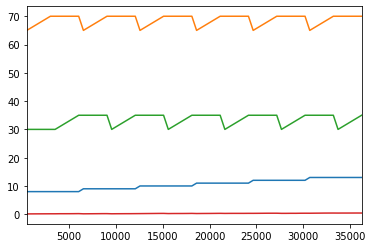

In [17]:
parametros.sort_values(by=['spread'])
parametros.ruedas.plot()
parametros.upper.plot()
parametros.lower.plot()
parametros.spread.plot()


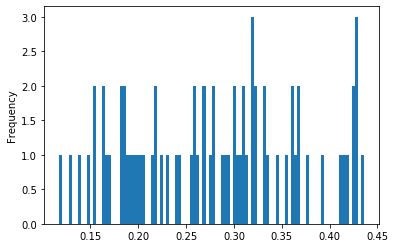

In [16]:
parametros.spread.plot(kind='hist',bins=100)

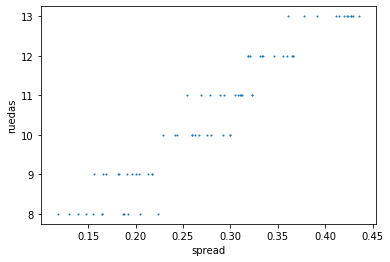

In [19]:
parametros.plot('spread', 'ruedas', s=1, kind='scatter')

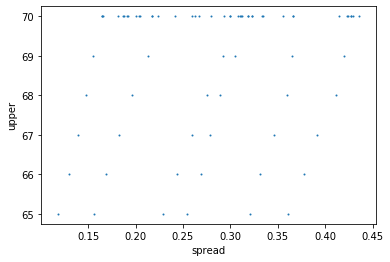

In [20]:
parametros.plot('spread', 'upper', s=1, kind='scatter')

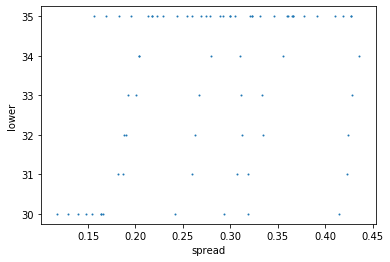

In [21]:
parametros.plot('spread', 'lower', s=1, kind='scatter')

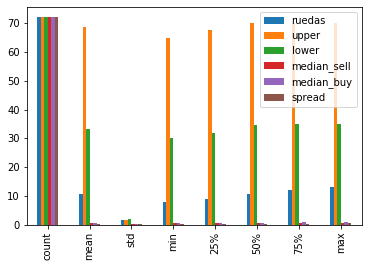

In [28]:
parametros.describe().plot(kind='bar')

In [29]:
parametros.describe()

,ruedas,upper,lower,median_sell,median_buy,spread
count,72.00000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,10.50000,68.750000,33.333333,0.420275,0.700069,0.279794
std,1.71981,1.750251,1.985866,0.027549,0.075772,0.087574
min,8.00000,65.000000,30.000000,0.382747,0.591366,0.117777
25%,9.00000,67.750000,31.750000,0.402493,0.642636,0.202701
50%,10.50000,70.000000,34.500000,0.421022,0.686342,0.284112
75%,12.00000,70.000000,35.000000,0.437457,0.768386,0.337544
max,13.00000,70.000000,35.000000,0.486840,0.838916,0.435680


In [10]:
parametros = parametros.sort_values('spread', ascending=False)
parametros.head(2)

,Unnamed: 0,ruedas,upper,lower,median_sell,median_buy,spread
70,35713,13,70,34,0.403236,0.838916,0.435680
69,35210,13,70,33,0.403236,0.832062,0.428826


In [44]:
parametros.spread.iloc[0]

0.4356795050916573

In [8]:
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

parametros = pd.read_excel('TPfinal.xlsx')

In [14]:
parametros

,Unnamed: 0,ruedas,upper,lower,median_sell,median_buy,spread
70,35713,13,70,34,0.403236,0.838916,0.435680
69,35210,13,70,33,0.403236,0.832062,0.428826
71,36216,13,70,35,0.403236,0.830337,0.427101
65,33198,13,70,35,0.403236,0.830337,0.427101
68,34707,13,70,32,0.403236,0.826864,0.423628
...,...,...,...,...,...,...,...
4,2515,8,69,30,0.446901,0.601569,0.154669
3,2012,8,68,30,0.453954,0.601569,0.147615
2,1509,8,67,30,0.461905,0.601569,0.139664
1,1006,8,66,30,0.472277,0.601569,0.129293


In [15]:
r = int(parametros.ruedas.iloc[0])
u = int(parametros.upper.iloc[0])
l = int(parametros.lower.iloc[0])
print('La mejor estrategia es: ', r, u , l)

La mejor estrategia es:  13 70 34


In [21]:
panel = pd.DataFrame()
sellpanel = pd.DataFrame()
buypanel = pd.DataFrame()
i = 0
for ticker in sp500_tickers:
    sellpanel1 = frsi(ticker,r,u,l).sell
    
    buypanel1 = frsi(ticker,r,u,l).buy
    
    sellpanel = pd.concat([sellpanel,sellpanel1],axis=1)
    buypanel = pd.concat([buypanel,buypanel1],axis=1)
    i = i + 1
    print(i)

panel = pd.concat([sellpanel,buypanel1],axis=1)
#spread_panel = buypanel.median() - sellpanel.median()    
#spread_panel.columns = [sp500_tickers]    
#spread_panel

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [36]:
panel = pd.concat([sellpanel,buypanel1],axis=1)
panel.describe()

,sell,sell,sell,sell,sell,sell,sell,sell,sell,sell,...,sell,sell,sell,sell,sell,sell,sell,sell,sell,buy
count,81.000000,103.000000,105.000000,130.000000,158.000000,94.000000,155.000000,148.000000,126.000000,150.000000,...,139.000000,121.000000,112.000000,111.000000,129.000000,131.000000,104.000000,93.000000,142.000000,54.000000
mean,-1.896717,-0.152109,0.884820,1.890132,0.747560,-1.287546,1.384423,5.294953,1.342783,1.596736,...,0.523423,1.910355,-1.260556,-0.095837,-0.020311,-0.317904,0.037929,0.565785,0.746980,4.068725
std,4.980361,4.223064,5.188174,8.863034,2.920911,4.442467,3.751291,10.924657,4.837463,4.326453,...,3.187138,9.074197,6.677776,3.729848,3.192142,5.094947,5.190158,4.564022,3.895451,8.419077
min,-15.378283,-10.993355,-12.649556,-19.204247,-14.651702,-13.014571,-9.823938,-17.823870,-11.727593,-19.567305,...,-10.741903,-15.728872,-20.323874,-10.254294,-10.926919,-16.075378,-18.435502,-11.905347,-9.766571,-28.569216
25%,-4.219124,-2.703684,-2.536008,-3.541785,-0.551884,-4.253630,-0.714461,-3.119346,-1.567333,-0.188418,...,-1.490012,-3.860300,-5.336785,-1.736640,-1.531041,-2.220636,-2.047446,-2.908102,-2.056940,0.033470
50%,-0.972467,0.656782,0.795056,2.942416,1.513606,-0.858871,1.764706,5.715427,2.462303,1.755162,...,0.883655,0.540559,-0.923824,0.149950,0.746380,0.307059,-0.132069,0.138014,0.828015,3.147283
75%,1.404594,1.941713,4.581763,7.994104,2.556150,1.301918,4.405247,12.738445,4.483728,4.067581,...,2.636466,5.742645,2.469656,2.253947,2.013226,3.014060,2.410391,3.896958,3.353279,5.903655
max,5.399533,11.065613,12.070129,22.865735,6.463407,12.526099,10.272014,38.064406,10.602815,9.501801,...,7.317427,27.335276,20.792850,8.017228,6.868233,8.930572,11.942012,11.595867,11.980283,36.833575


In [63]:
panel1=panel.describe()
panel1.median()

sell    0.212427
sell    1.299247
sell    2.657450
sell    5.450574
sell    2.038066
sell    0.211880
sell    2.775454
sell    8.357425
sell    3.464442
sell    2.911371
sell    1.107562
sell    2.133336
sell    2.510416
sell    0.922131
sell    1.106118
sell    1.704560
sell    2.763090
sell    1.029105
sell    4.394839
sell    1.520706
sell    1.438029
sell    2.540641
sell    0.599872
sell    0.566433
sell    2.741610
sell    1.749460
sell    1.054495
sell    1.074023
sell   -0.519790
sell    0.675593
          ...   
buy     1.647816
buy     4.053724
buy     2.118419
buy     4.252949
buy     0.727207
buy     2.215749
buy     3.355456
buy     2.880046
buy     1.755288
buy     2.648404
buy     1.001202
buy     2.544643
buy     4.293248
buy     1.423342
buy     1.177027
buy     4.626471
buy     2.816285
buy     1.600218
buy     0.400546
buy     2.200267
buy     2.350548
buy     3.368451
buy     2.729519
buy     3.357178
buy     3.694051
buy     2.210583
buy     7.495796
buy     2.8698